This notebook contains the analysis for Figures 5, and 6 in the publication ["The Slowing Rate of CpG Depletion in SARS-CoV-2 Genomes Is Consistent with Adaptations to the Human Host"](https://academic.oup.com/mbe/article/39/3/msac029/6521032)

All ZAP-binding motifs end with a terminal CpG dinucleotide. The percentage of sequences that lost ZAP-binding motifs and the terminal CpG within the motifs are plotted. The loss of ZAP-binding motifs from the SARS-CoV-2 genomes is primarily associated with the loss of the terminal CpG within motifs.

In [254]:
# %reset

# Library imports

In [255]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns
%matplotlib inline

Library version used:
- scipy: v1.7.1
- np: v1.21.2
- pd: v1.3.3
- sns: v0.11.2
- matplotlib: v3.4.2

# Data import

In [256]:
df_zap4 = pd.read_csv('../csv_files/counter_file_zap_4_motif.csv')\
            .drop(columns=['python_based_indices'])\
            .rename(columns={'mapping': 'zap_binding_motif_position'})

df_zap5 = pd.read_csv('../csv_files/counter_file_zap_5_motif.csv')\
            .drop(columns=['python_based_indices'])\
            .rename(columns={'mapping': 'zap_binding_motif_position'})

df_zap6 = pd.read_csv('../csv_files/counter_file_zap_6_motif.csv')\
            .drop(columns=['python_based_indices'])\
            .rename(columns={'mapping': 'zap_binding_motif_position'})

df_zap7 = pd.read_csv('../csv_files/counter_file_zap_7_motif.csv')\
            .drop(columns=['python_based_indices'])\
            .rename(columns={'mapping': 'zap_binding_motif_position'})

df_zap8 = pd.read_csv('../csv_files/counter_file_zap_8_motif.csv')\
            .drop(columns=['python_based_indices'])\
            .rename(columns={'mapping': 'zap_binding_motif_position'})


df_zap4.name = 'ZAP-binding motif (n=4)'
df_zap5.name = 'ZAP-binding motif (n=5)'
df_zap6.name = 'ZAP-binding motif (n=6)'
df_zap7.name = 'ZAP-binding motif (n=7)'
df_zap8.name = 'ZAP-binding motif (n=8)'

print(
    f'- Length of {df_zap4.name} dataframe: {len(df_zap4)}\n'
    f'- Length of {df_zap5.name} dataframe: {len(df_zap5)}\n'
    f'- Length of {df_zap6.name} dataframe: {len(df_zap6)}\n'
    f'- Length of {df_zap7.name} dataframe: {len(df_zap7)}\n'
    f'- Length of {df_zap8.name} dataframe: {len(df_zap8)}'
)

df_cpg = pd.read_csv('../csv_files/counter_file_cpg.csv')\
            .drop(columns=['python_based_indices'])\
            .rename(columns={'mapping': 'cpg_position'})

print(f'- Length of dataframe with CpG positions and their frequencies: {len(df_cpg)}')

- Length of ZAP-binding motif (n=4) dataframe: 496
- Length of ZAP-binding motif (n=5) dataframe: 458
- Length of ZAP-binding motif (n=6) dataframe: 464
- Length of ZAP-binding motif (n=7) dataframe: 510
- Length of ZAP-binding motif (n=8) dataframe: 459
- Length of dataframe with CpG positions and their frequencies: 7747


In [257]:
df_cpgs_in_zap_pos = pd.read_csv('../csv_files/cpg_sites_in_zap_motif_analysis_01.csv')
df_cpgs_in_zap = pd.read_csv('../csv_files/cpg_sites_in_zap_motif_analysis_02.csv')

In [331]:
df_tlr7 = pd.read_csv('../csv_files/zap_data_for_tlr7_recognizable_motif_analysis.csv')\
            .dropna()


# Some Initializations

In [259]:
df_zap4.query('percentage >= 90', inplace=True)
df_zap5.query('percentage >= 90', inplace=True)
df_zap6.query('percentage >= 90', inplace=True)
df_zap7.query('percentage >= 90', inplace=True)
df_zap8.query('percentage >= 90', inplace=True)


print(
    f'After filtration: \n'
    f'- Length of {df_zap4.name} dataframe: {len(df_zap4)}\n'
    f'- Length of {df_zap5.name} dataframe: {len(df_zap5)}\n'
    f'- Length of {df_zap6.name} dataframe: {len(df_zap6)}\n'
    f'- Length of {df_zap7.name} dataframe: {len(df_zap7)}\n'
    f'- Length of {df_zap8.name} dataframe: {len(df_zap8)}'
)

After filtration: 
- Length of ZAP-binding motif (n=4) dataframe: 12
- Length of ZAP-binding motif (n=5) dataframe: 24
- Length of ZAP-binding motif (n=6) dataframe: 15
- Length of ZAP-binding motif (n=7) dataframe: 17
- Length of ZAP-binding motif (n=8) dataframe: 22


In [260]:
df_zap4['gap'] = 4
df_zap5['gap'] = 5
df_zap6['gap'] = 6
df_zap7['gap'] = 7
df_zap8['gap'] = 8

total_seqs_analyzed = 1410423

df_zap4['Number of sequences where ZAP-binding motif is lost'] = total_seqs_analyzed - df_zap4['frequency']
df_zap5['Number of sequences where ZAP-binding motif is lost'] = total_seqs_analyzed - df_zap5['frequency']
df_zap6['Number of sequences where ZAP-binding motif is lost'] = total_seqs_analyzed - df_zap6['frequency']
df_zap7['Number of sequences where ZAP-binding motif is lost'] = total_seqs_analyzed - df_zap7['frequency']
df_zap8['Number of sequences where ZAP-binding motif is lost'] = total_seqs_analyzed - df_zap8['frequency']

The SARS-CoV-2 WIV04 strain/isolate was used as the reference sequence (Accession ID: EPI_ISL_402124).

In [261]:
ref_seq = 'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGAAGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGCATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGGCTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTCTTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGGTTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCCACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTCTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGTAAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTTTGAGTACTACCACACAACTGATCCTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTTAATGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTAACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGTGGACAACAGCAGACAACCCTTAAGGGTGTAGAAGCTGTTATGTACATGGGCACACTTTCTTATGAACAATTTAAGAAAGGTGTTCAGATACCTTGTACGTGTGGTAAACAAGCTACAAAATATCTAGTACAACAGGAGTCACCTTTTGTTATGATGTCAGCACCACCTGCTCAGTATGAACTTAAGCATGGTACATTTACTTGTGCTAGTGAGTACACTGGTAATTACCAGTGTGGTCACTATAAACATATAACTTCTAAAGAAACTTTGTATTGCATAGACGGTGCTTTACTTACAAAGTCCTCAGAATACAAAGGTCCTATTACGGATGTTTTCTACAAAGAAAACAGTTACACAACAACCATAAAACCAGTTACTTATAAATTGGATGGTGTTGTTTGTACAGAAATTGACCCTAAGTTGGACAATTATTATAAGAAAGACAATTCTTATTTCACAGAGCAACCAATTGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAATTTTAAGTTTGTATGTGATAATATCAAATTTGCTGATGATTTAAACCAGTTAACTGGTTATAAGAAACCTGCTTCAAGAGAGCTTAAAGTTACATTTTTCCCTGACTTAAATGGTGATGTGGTGGCTATTGATTATAAACACTACACACCCTCTTTTAAGAAAGGAGCTAAATTGTTACATAAACCTATTGTTTGGCATGTTAACAATGCAACTAATAAAGCCACGTATAAACCAAATACCTGGTGTATACGTTGTCTTTGGAGCACAAAACCAGTTGAAACATCAAATTCGTTTGATGTACTGAAGTCAGAGGACGCGCAGGGAATGGATAATCTTGCCTGCGAAGATCTAAAACCAGTCTCTGAAGAAGTAGTGGAAAATCCTACCATACAGAAAGACGTTCTTGAGTGTAATGTGAAAACTACCGAAGTTGTAGGAGACATTATACTTAAACCAGCAAATAATAGTTTAAAAATTACAGAAGAGGTTGGCCACACAGATCTAATGGCTGCTTATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATCTAGAGTATTAGGTTTGAAAACCCTTGCTACTCATGGTTTAGCTGCTGTTAATAGTGTCCCTTGGGATACTATAGCTAATTATGCTAAGCCTTTTCTTAACAAAGTTGTTAGTACAACTACTAACATAGTTACACGGTGTTTAAACCGTGTTTGTACTAATTATATGCCTTATTTCTTTACTTTATTGCTACAATTGTGTACTTTTACTAGAAGTACAAATTCTAGAATTAAAGCATCTATGCCGACTACTATAGCAAAGAATACTGTTAAGAGTGTCGGTAAATTTTGTCTAGAGGCTTCATTTAATTATTTGAAGTCACCTAATTTTTCTAAACTGATAAATATTATAATTTGGTTTTTACTATTAAGTGTTTGCCTAGGTTCTTTAATCTACTCAACCGCTGCTTTAGGTGTTTTAATGTCTAATTTAGGCATGCCTTCTTACTGTACTGGTTACAGAGAAGGCTATTTGAACTCTACTAATGTCACTATTGCAACCTACTGTACTGGTTCTATACCTTGTAGTGTTTGTCTTAGTGGTTTAGATTCTTTAGACACCTATCCTTCTTTAGAAACTATACAAATTACCATTTCATCTTTTAAATGGGATTTAACTGCTTTTGGCTTAGTTGCAGAGTGGTTTTTGGCATATATTCTTTTCACTAGGTTTTTCTATGTACTTGGATTGGCTGCAATCATGCAATTGTTTTTCAGCTATTTTGCAGTACATTTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTACAAATGGCCCCGATTTCAGCTATGGTTAGAATGTACATCTTCTTTGCATCATTTTATTATGTATGGAAAAGTTATGTGCATGTTGTAGACGGTTGTAATTCATCAACTTGTATGATGTGTTACAAACGTAATAGAGCAACAAGAGTCGAATGTACAACTATTGTTAATGGTGTTAGAAGGTCCTTTTATGTCTATGCTAATGGAGGTAAAGGCTTTTGCAAACTACACAATTGGAATTGTGTTAATTGTGATACATTCTGTGCTGGTAGTACATTTATTAGTGATGAAGTTGCGAGAGACTTGTCACTACAGTTTAAAAGACCAATAAATCCTACTGACCAGTCTTCTTACATCGTTGATAGTGTTACAGTGAAGAATGGTTCCATCCATCTTTACTTTGATAAAGCTGGTCAAAAGACTTATGAAAGACATTCTCTCTCTCATTTTGTTAACTTAGACAACCTGAGAGCTAATAACACTAAAGGTTCATTGCCTATTAATGTTATAGTTTTTGATGGTAAATCAAAATGTGAAGAATCATCTGCAAAATCAGCGTCTGTTTACTACAGTCAGCTTATGTGTCAACCTATACTGTTACTAGATCAGGCATTAGTGTCTGATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTACGTTAATACGTTTTCATCAACTTTTAACGTACCAATGGAAAAACTCAAAACACTAGTTGCAACTGCAGAAGCTGAACTTGCAAAGAATGTGTCCTTAGACAATGTCTTATCTACTTTTATTTCAGCAGCTCGGCAAGGGTTTGTTGATTCAGATGTAGAAACTAAAGATGTTGTTGAATGTCTTAAATTGTCACATCAATCTGACATAGAAGTTACTGGCGATAGTTGTAATAACTATATGCTCACCTATAACAAAGTTGAAAACATGACACCCCGTGACCTTGGTGCTTGTATTGACTGTAGTGCGCGTCATATTAATGCGCAGGTAGCAAAAAGTCACAACATTGCTTTGATATGGAACGTTAAAGATTTCATGTCATTGTCTGAACAACTACGAAAACAAATACGTAGTGCTGCTAAAAAGAATAACTTACCTTTTAAGTTGACATGTGCAACTACTAGACAAGTTGTTAATGTTGTAACAACAAAGATAGCACTTAAGGGTGGTAAAATTGTTAATAATTGGTTGAAGCAGTTAATTAAAGTTACACTTGTGTTCCTTTTTGTTGCTGCTATTTTCTATTTAATAACACCTGTTCATGTCATGTCTAAACATACTGACTTTTCAAGTGAAATCATAGGATACAAGGCTATTGATGGTGGTGTCACTCGTGACATAGCATCTACAGATACTTGTTTTGCTAACAAACATGCTGATTTTGACACATGGTTTAGCCAGCGTGGTGGTAGTTATACTAATGACAAAGCTTGCCCATTGATTGCTGCAGTCATAACAAGAGAAGTGGGTTTTGTCGTGCCTGGTTTGCCTGGCACGATATTACGCACAACTAATGGTGACTTTTTGCATTTCTTACCTAGAGTTTTTAGTGCAGTTGGTAACATCTGTTACACACCATCAAAACTTATAGAGTACACTGACTTTGCAACATCAGCTTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGTAAGCCAGTACCATATTGTTATGATACCAATGTACTAGAAGGTTCTGTTGCTTATGAAAGTTTACGCCCTGACACACGTTATGTGCTCATGGATGGCTCTATTATTCAATTTCCTAACACCTACCTTGAAGGTTCTGTTAGAGTGGTAACAACTTTTGATTCTGAGTACTGTAGGCACGGCACTTGTGAAAGATCAGAAGCTGGTGTTTGTGTATCTACTAGTGGTAGATGGGTACTTAACAATGATTATTACAGATCTTTACCAGGAGTTTTCTGTGGTGTAGATGCTGTAAATTTACTTACTAATATGTTTACACCACTAATTCAACCTATTGGTGCTTTGGACATATCAGCATCTATAGTAGCTGGTGGTATTGTAGCTATCGTAGTAACATGCCTTGCCTACTATTTTATGAGGTTTAGAAGAGCTTTTGGTGAATACAGTCATGTAGTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGTTTAACACCAGTTTACTCATTCTTACCTGGTGTTTATTCTGTTATTTACTTGTACTTGACATTTTATCTTACTAATGATGTTTCTTTTTTAGCACATATTCAGTGGATGGTTATGTTCACACCTTTAGTACCTTTCTGGATAACAATTGCTTATATCATTTGTATTTCCACAAAGCATTTCTATTGGTTCTTTAGTAATTACCTAAAGAGACGTGTAGTCTTTAATGGTGTTTCCTTTAGTACTTTTGAAGAAGCTGCGCTGTGCACCTTTTTGTTAAATAAAGAAATGTATCTAAAGTTGCGTAGTGATGTGCTATTACCTCTTACGCAATATAATAGATACTTAGCTCTTTATAATAAGTACAAGTATTTTAGTGGAGCAATGGATACAACTAGCTACAGAGAAGCTGCTTGTTGTCATCTCGCAAAGGCTCTCAATGACTTCAGTAACTCAGGTTCTGATGTTCTTTACCAACCACCACAAACCTCTATCACCTCAGCTGTTTTGCAGAGTGGTTTTAGAAAAATGGCATTCCCATCTGGTAAAGTTGAGGGTTGTATGGTACAAGTAACTTGTGGTACAACTACACTTAACGGTCTTTGGCTTGATGACGTAGTTTACTGTCCAAGACATGTGATCTGCACCTCTGAAGACATGCTTAACCCTAATTATGAAGATTTACTCATTCGTAAGTCTAATCATAATTTCTTGGTACAGGCTGGTAATGTTCAACTCAGGGTTATTGGACATTCTATGCAAAATTGTGTACTTAAGCTTAAGGTTGATACAGCCAATCCTAAGACACCTAAGTATAAGTTTGTTCGCATTCAACCAGGACAGACTTTTTCAGTGTTAGCTTGTTACAATGGTTCACCATCTGGTGTTTACCAATGTGCTATGAGGCCCAATTTCACTATTAAGGGTTCATTCCTTAATGGTTCATGTGGTAGTGTTGGTTTTAACATAGATTATGACTGTGTCTCTTTTTGTTACATGCACCATATGGAATTACCAACTGGAGTTCATGCTGGCACAGACTTAGAAGGTAACTTTTATGGACCTTTTGTTGACAGGCAAACAGCACAAGCAGCTGGTACGGACACAACTATTACAGTTAATGTTTTAGCTTGGTTGTACGCTGCTGTTATAAATGGAGACAGGTGGTTTCTCAATCGATTTACCACAACTCTTAATGACTTTAACCTTGTGGCTATGAAGTACAATTATGAACCTCTAACACAAGACCATGTTGACATACTAGGACCTCTTTCTGCTCAAACTGGAATTGCCGTTTTAGATATGTGTGCTTCATTAAAAGAATTACTGCAAAATGGTATGAATGGACGTACCATATTGGGTAGTGCTTTATTAGAAGATGAATTTACACCTTTTGATGTTGTTAGACAATGCTCAGGTGTTACTTTCCAAAGTGCAGTGAAAAGAACAATCAAGGGTACACACCACTGGTTGTTACTCACAATTTTGACTTCACTTTTAGTTTTAGTCCAGAGTACTCAATGGTCTTTGTTCTTTTTTTTGTATGAAAATGCCTTTTTACCTTTTGCTATGGGTATTATTGCTATGTCTGCTTTTGCAATGATGTTTGTCAAACATAAGCATGCATTTCTCTGTTTGTTTTTGTTACCTTCTCTTGCCACTGTAGCTTATTTTAATATGGTCTATATGCCTGCTAGTTGGGTGATGCGTATTATGACATGGTTGGATATGGTTGATACTAGTTTGTCTGGTTTTAAGCTAAAAGACTGTGTTATGTATGCATCAGCTGTAGTGTTACTAATCCTTATGACAGCAAGAACTGTGTATGATGATGGTGCTAGGAGAGTGTGGACACTTATGAATGTCTTGACACTCGTTTATAAAGTTTATTATGGTAATGCTTTAGATCAAGCCATTTCCATGTGGGCTCTTATAATCTCTGTTACTTCTAACTACTCAGGTGTAGTTACAACTGTCATGTTTTTGGCCAGAGGTATTGTTTTTATGTGTGTTGAGTATTGCCCTATTTTCTTCATAACTGGTAATACACTTCAGTGTATAATGCTAGTTTATTGTTTCTTAGGCTATTTTTGTACTTGTTACTTTGGCCTCTTTTGTTTACTCAACCGCTACTTTAGACTGACTCTTGGTGTTTATGATTACTTAGTTTCTACACAGGAGTTTAGATATATGAATTCACAGGGACTACTCCCACCCAAGAATAGCATAGATGCCTTCAAACTCAACATTAAATTGTTGGGTGTTGGTGGCAAACCTTGTATCAAAGTAGCCACTGTACAGTCTAAAATGTCAGATGTAAAGTGCACATCAGTAGTCTTACTCTCAGTTTTGCAACAACTCAGAGTAGAATCATCATCTAAATTGTGGGCTCAATGTGTCCAGTTACACAATGACATTCTCTTAGCTAAAGATACTACTGAAGCCTTTGAAAAAATGGTTTCACTACTTTCTGTTTTGCTTTCCATGCAGGGTGCTGTAGACATAAACAAGCTTTGTGAAGAAATGCTGGACAACAGGGCAACCTTACAAGCTATAGCCTCAGAGTTTAGTTCCCTTCCATCATATGCAGCTTTTGCTACTGCTCAAGAAGCTTATGAGCAGGCTGTTGCTAATGGTGATTCTGAAGTTGTTCTTAAAAAGTTGAAGAAGTCTTTGAATGTGGCTAAATCTGAATTTGACCGTGATGCAGCCATGCAACGTAAGTTGGAAAAGATGGCTGATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACAAGAGGGCAAAAGTTACTAGTGCTATGCAGACAATGCTTTTCACTATGCTTAGAAAGTTGGATAATGATGCACTCAACAACATTATCAACAATGCAAGAGATGGTTGTGTTCCCTTGAACATAATACCTCTTACAACAGCAGCCAAACTAATGGTTGTCATACCAGACTATAACACATATAAAAATACGTGTGATGGTACAACATTTACTTATGCATCAGCATTGTGGGAAATCCAACAGGTTGTAGATGCAGATAGTAAAATTGTTCAACTTAGTGAAATTAGTATGGACAATTCACCTAATTTAGCATGGCCTCTTATTGTAACAGCTTTAAGGGCCAATTCTGCTGTCAAATTACAGAATAATGAGCTTAGTCCTGTTGCACTACGACAGATGTCTTGTGCTGCCGGTACTACACAAACTGCTTGCACTGATGACAATGCGTTAGCTTACTACAACACAACAAAGGGAGGTAGGTTTGTACTTGCACTGTTATCCGATTTACAGGATTTGAAATGGGCTAGATTCCCTAAGAGTGATGGAACTGGTACTATCTATACAGAACTGGAACCACCTTGTAGGTTTGTTACAGACACACCTAAAGGTCCTAAAGTGAAGTATTTATACTTTATTAAAGGATTAAACAACCTAAATAGAGGTATGGTACTTGGTAGTTTAGCTGCCACAGTACGTCTACAAGCTGGTAATGCAACAGAAGTGCCTGCCAATTCAACTGTATTATCTTTCTGTGCTTTTGCTGTAGATGCTGCTAAAGCTTACAAAGATTATCTAGCTAGTGGGGGACAACCAATCACTAATTGTGTTAAGATGTTGTGTACACACACTGGTACTGGTCAGGCAATAACAGTTACACCGGAAGCCAATATGGATCAAGAATCCTTTGGTGGTGCATCGTGTTGTCTGTACTGCCGTTGCCACATAGATCATCCAAATCCTAAAGGATTTTGTGACTTAAAAGGTAAGTATGTACAAATACCTACAACTTGTGCTAATGACCCTGTGGGTTTTACACTTAAAAACACAGTCTGTACCGTCTGCGGTATGTGGAAAGGTTATGGCTGTAGTTGTGATCAACTCCGCGAACCCATGCTTCAGTCAGCTGATGCACAATCGTTTTTAAACGGGTTTGCGGTGTAAGTGCAGCCCGTCTTACACCGTGCGGCACAGGCACTAGTACTGATGTCGTATACAGGGCTTTTGACATCTACAATGATAAAGTAGCTGGTTTTGCTAAATTCCTAAAAACTAATTGTTGTCGCTTCCAAGAAAAGGACGAAGATGACAATTTAATTGATTCTTACTTTGTAGTTAAGAGACACACTTTCTCTAACTACCAACATGAAGAAACAATTTATAATTTACTTAAGGATTGTCCAGCTGTTGCTAAACATGACTTCTTTAAGTTTAGAATAGACGGTGACATGGTACCACATATATCACGTCAACGTCTTACTAAATACACAATGGCAGACCTCGTCTATGCTTTAAGGCATTTTGATGAAGGTAATTGTGACACATTAAAAGAAATACTTGTCACATACAATTGTTGTGATGATGATTATTTCAATAAAAAGGACTGGTATGATTTTGTAGAAAACCCAGATATATTACGCGTATACGCCAACTTAGGTGAACGTGTACGCCAAGCTTTGTTAAAAACAGTACAATTCTGTGATGCCATGCGAAATGCTGGTATTGTTGGTGTACTGACATTAGATAATCAAGATCTCAATGGTAACTGGTATGATTTCGGTGATTTCATACAAACCACGCCAGGTAGTGGAGTTCCTGTTGTAGATTCTTATTATTCATTGTTAATGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATATGACTTCACGGAAGAGAGGTTAAAACTCTTTGACCGTTATTTTAAATATTGGGATCAGACATACCACCCAAATTGTGTTAACTGTTTGGATGACAGATGCATTCTGCATTGTGCAAACTTTAATGTTTTATTCTCTACAGTGTTCCCACCTACAAGTTTTGGACCACTAGTGAGAAAAATATTTGTTGATGGTGTTCCATTTGTAGTTTCAACTGGATACCACTTCAGAGAGCTAGGTGTTGTACATAATCAGGATGTAAACTTACATAGCTCTAGACTTAGTTTTAAGGAATTACTTGTGTATGCTGCTGACCCTGCTATGCACGCTGCTTCTGGTAATCTATTACTAGATAAACGCACTACGTGCTTTTCAGTAGCTGCACTTACTAACAATGTTGCTTTTCAAACTGTCAAACCCGGTAATTTTAACAAAGACTTCTATGACTTTGCTGTGTCTAAGGGTTTCTTTAAGGAAGGAAGTTCTGTTGAATTAAAACACTTCTTCTTTGCTCAGGATGGTAATGCTGCTATCAGCGATTATGACTACTATCGTTATAATCTACCAACAATGTGTGATATCAGACAACTACTATTTGTAGTTGAAGTTGTTGATAAGTACTTTGATTGTTACGATGGTGGCTGTATTAATGCTAACCAAGTCATCGTCAACAACCTAGACAAATCAGCTGGTTTTCCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAATCCTAGGGGCCGGCTGTTTTGTAGATGATATCGTAAAAACAGATGGTACACTTATGATTGAACGGTTCGTGTCTTTAGCTATAGATGCTTACCCACTTACTAAACATCCTAATCAGGAGTATGCTGATGTCTTTCATTTGTACTTACAATACATAAGAAAGCTACATGATGAGTTAACAGGACACATGTTAGACATGTATTCTGTTATGCTTACTAATGATAACACTTCAAGGTATTGGGAACCTGAGTTTTATGAGGCTATGTACACACCGCATACAGTCTTACAGGCTGTTGGGGCTTGTGTTCTTTGCAATTCACAGACTTCATTAAGATGTGGTGCTTGCATACGTAGACCATTCTTATGTTGTAAATGCTGTTACGACCATGTCATATCAACATCACATAAATTAGTCTTGTCTGTTAATCCGTATGTTTGCAATGCTCCAGGTTGTGATGTCACAGATGTGACTCAACTTTACTTAGGAGGTATGAGCTATTATTGTAAATCACATAAACCACCCATTAGTTTTCCATTGTGTGCTAATGGACAAGTTTTTGGTTTATATAAAAATACATGTGTTGGTAGCGATAATGTTACTGACTTTAATGCAATTGCAACATGTGACTGGACAAATGCTGGTGATTACATTTTAGCTAACACCTGTACTGAAAGACTCAAGCTTTTTGCAGCAGAAACGCTCAAAGCTACTGAGGAGACATTTAAACTGTCTTATGGTATTGCTACTGTACGTGAAGTGCTGTCTGACAGAGAATTACATCTTTCATGGGAAGTTGGTAAACCTAGACCACCACTTAACCGAAATTATGTCTTTACTGGTTATCGTGTAACTAAAAACAGTAAAGTACAAATAGGAGAGTACACCTTTGAAAAAGGTGACTATGGTGATGCTGTTGTTTACCGAGGTACAACAACTTACAAATTAAATGTTGGTGATTATTTTGTGCTGACATCACATACAGTAATGCCATTAAGTGCACCTACACTAGTGCCACAAGAGCACTATGTTAGAATTACTGGCTTATACCCAACACTCAATATCTCAGATGAGTTTTCTAGCAATGTTGCAAATTATCAAAAGGTTGGTATGCAAAAGTATTCTACACTCCAGGGACCACCTGGTACTGGTAAGAGTCATTTTGCTATTGGCCTAGCTCTCTACTACCCTTCTGCTCGCATAGTGTATACAGCTTGCTCTCATGCCGCTGTTGATGCACTATGTGAGAAGGCATTAAAATATTTGCCTATAGATAAATGTAGTAGAATTATACCTGCACGTGCTCGTGTAGAGTGTTTTGATAAATTCAAAGTGAATTCAACATTAGAACAGTATGTCTTTTGTACTGTAAATGCATTGCCTGAGACGACAGCAGATATAGTTGTCTTTGATGAAATTTCAATGGCCACAAATTATGATTTGAGTGTTGTCAATGCCAGATTACGTGCTAAGCACTATGTGTACATTGGCGACCCTGCTCAATTACCTGCACCACGCACATTGCTAACTAAGGGCACACTAGAACCAGAATATTTCAATTCAGTGTGTAGACTTATGAAAACTATAGGTCCAGACATGTTCCTCGGAACTTGTCGGCGTTGTCCTGCTGAAATTGTTGACACTGTGAGTGCTTTGGTTTATGATAATAAGCTTAAAGCACATAAAGACAAATCAGCTCAATGCTTTAAAATGTTTTATAAGGGTGTTATCACGCATGATGTTTCATCTGCAATTAACAGGCCACAAATAGGCGTGGTAAGAGAATTCCTTACACGTAACCCTGCTTGGAGAAAAGCTGTCTTTATTTCACCTTATAATTCACAGAATGCTGTAGCCTCAAAGATTTTGGGACTACCAACTCAAACTGTTGATTCATCACAGGGCTCAGAATATGACTATGTCATATTCACTCAAACCACTGAAACAGCTCACTCTTGTAATGTAAACAGATTTAATGTTGCTATTACCAGAGCAAAAGTAGGCATACTTTGCATAATGTCTGATAGAGACCTTTATGACAAGTTGCAATTTACAAGTCTTGAAATTCCACGTAGGAATGTGGCAACTTTACAAGCTGAAAATGTAACAGGACTCTTTAAAGATTGTAGTAAGGTAATCACTGGGTTACATCCTACACAGGCACCTACACACCTCAGTGTTGACACTAAATTCAAAACTGAAGGTTTATGTGTTGACATACCTGGCATACCTAAGGACATGACCTATAGAAGACTCATCTCTATGATGGGTTTTAAAATGAATTATCAAGTTAATGGTTACCCTAACATGTTTATCACCCGCGAAGAAGCTATAAGACATGTACGTGCATGGATTGGCTTCGATGTCGAGGGGTGTCATGCTACTAGAGAAGCTGTTGGTACCAATTTACCTTTACAGCTAGGTTTTTCTACAGGTGTTAACCTAGTTGCTGTACCTACAGGTTATGTTGATACACCTAATAATACAGATTTTTCCAGAGTTAGTGCTAAACCACCGCCTGGAGATCAATTTAAACACCTCATACCACTTATGTACAAAGGACTTCCTTGGAATGTAGTGCGTATAAAGATTGTACAAATGTTAAGTGACACACTTAAAAATCTCTCTGACAGAGTCGTATTTGTCTTATGGGCACATGGCTTTGAGTTGACATCTATGAAGTATTTTGTGAAAATAGGACCTGAGCGCACCTGTTGTCTATGTGATAGACGTGCCACATGCTTTTCCACTGCTTCAGACACTTATGCCTGTTGGCATCATTCTATTGGATTTGATTACGTCTATAATCCGTTTATGATTGATGTTCAACAATGGGGTTTTACAGGTAACCTACAAAGCAACCATGATCTGTATTGTCAAGTCCATGGTAATGCACATGTAGCTAGTTGTGATGCAATCATGACTAGGTGTCTAGCTGTCCACGAGTGCTTTGTTAAGCGTGTTGACTGGACTATTGAATATCCTATAATTGGTGATGAACTGAAGATTAATGCGGCTTGTAGAAAGGTTCAACACATGGTTGTTAAAGCTGCATTATTAGCAGACAAATTCCCAGTTCTTCACGACATTGGTAACCCTAAAGCTATTAAGTGTGTACCTCAAGCTGATGTAGAATGGAAGTTCTATGATGCACAGCCTTGTAGTGACAAAGCTTATAAAATAGAAGAATTATTCTATTCTTATGCCACACATTCTGACAAATTCACAGATGGTGTATGCCTATTTTGGAATTGCAATGTCGATAGATATCCTGCTAATTCCATTGTTTGTAGATTTGACACTAGAGTGCTATCTAACCTTAACTTGCCTGGTTGTGATGGTGGCAGTTTGTATGTAAATAAACATGCATTCCACACACCAGCTTTTGATAAAAGTGCTTTTGTTAATTTAAAACAATTACCATTTTTCTATTACTCTGACAGTCCATGTGAGTCTCATGGAAAACAAGTAGTGTCAGATATAGATTATGTACCACTAAAGTCTGCTACGTGTATAACACGTTGCAATTTAGGTGGTGCTGTCTGTAGACATCATGCTAATGAGTACAGATTGTATCTCGATGCTTATAACATGATGATCTCAGCTGGCTTTAGCTTGTGGGTTTACAAACAATTTGATACTTATAACCTCTGGAACACTTTTACAAGACTTCAGAGTTTAGAAAATGTGGCTTTTAATGTTGTAAATAAGGGACACTTTGATGGACAACAGGGTGAAGTACCAGTTTCTATCATTAATAACACTGTTTACACAAAAGTTGATGGTGTTGATGTAGAATTGTTTGAAAATAAAACAACATTACCTGTTAATGTAGCATTTGAGCTTTGGGCTAAGCGCAACATTAAACCAGTACCAGAGGTGAAAATACTCAATAATTTGGGTGTGGACATTGCTGCTAATACTGTGATCTGGGACTACAAAAGAGATGCTCCAGCACATATATCTACTATTGGTGTTTGTTCTATGACTGACATAGCCAAGAAACCAACTGAAACGATTTGTGCACCACTCACTGTCTTTTTTGATGGTAGAGTTGATGGTCAAGTAGACTTATTTAGAAATGCCCGTAATGGTGTTCTTATTACAGAAGGTAGTGTTAAAGGTTTACAACCATCTGTAGGTCCCAAACAAGCTAGTCTTAATGGAGTCACATTAATTGGAGAAGCCGTAAAAACACAGTTCAATTATTATAAGAAAGTTGATGGTGTTGTCCAACAATTACCTGAAACTTACTTTACTCAGAGTAGAAATTTACAAGAATTTAAACCCAGGAGTCAAATGGAAATTGATTTCTTAGAATTAGCTATGGATGAATTCATTGAACGGTATAAATTAGAAGGCTATGCCTTCGAACATATCGTTTATGGAGATTTTAGTCATAGTCAGTTAGGTGGTTTACATCTACTGATTGGACTAGCTAAACGTTTTAAGGAATCACCTTTTGAATTAGAAGATTTTATTCCTATGGACAGTACAGTTAAAAACTATTTCATAACAGATGCGCAAACAGGTTCATCTAAGTGTGTGTGTTCTGTTATTGATTTATTACTTGATGATTTTGTTGAAATAATAAAATCCCAAGATTTATCTGTAGTTTCTAAGGTTGTCAAAGTGACTATTGACTATACAGAAATTTCATTTATGCTTTGGTGTAAAGATGGCCATGTAGAAACATTTTACCCAAAATTACAATCTAGTCAAGCGTGGCAACCGGGTGTTGCTATGCCTAATCTTTACAAAATGCAAAGAATGCTATTAGAAAAGTGTGACCTTCAAAATTATGGTGATAGTGCAACATTACCTAAAGGCATAATGATGAATGTCGCAAAATATACTCAACTGTGTCAATATTTAAACACATTAACATTAGCTGTACCCTATAATATGAGAGTTATACATTTTGGTGCTGGTTCTGATAAAGGAGTTGCACCAGGTACAGCTGTTTTAAGACAGTGGTTGCCTACGGGTACGCTGCTTGTCGATTCAGATCTTAATGACTTTGTCTCTGATGCAGATTCAACTTTGATTGGTGATTGTGCAACTGTACATACAGCTAATAAATGGGATCTCATTATTAGTGATATGTACGACCCTAAGACTAAAAATGTTACAAAAGAAAATGACTCTAAAGAGGGTTTTTTCACTTACATTTGTGGGTTTATACAACAAAAGCTAGCTCTTGGAGGTTCCGTGGCTATAAAGATAACAGAACATTCTTGGAATGCTGATCTTTATAAGCTCATGGGACACTTCGCATGGTGGACAGCCTTTGTTACTAATGTGAATGCGTCATCATCTGAAGCATTTTTAATTGGATGTAATTATCTTGGCAAACCACGCGAACAAATAGATGGTTATGTCATGCATGCAAATTACATATTTTGGAGGAATACAAATCCAATTCAGTTGTCTTCCTATTCTTTATTTGACATGAGTAAATTTCCCCTTAAATTAAGGGGTACTGCTGTTATGTCTTTAAAAGAAGGTCAAATCAATGATATGATTTTATCTCTTCTTAGTAAAGGTAGACTTATAATTAGAGAAAACAACAGAGTTGTTATTTCTAGTGATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAAACGAACTTATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGAAGCAAGGTGAAATCAAGGATGCTACTCCTTCAGATTTTGTTCGCGCTACTGCAACGATACCGATACAAGCCTCACTCCCTTTCGGATGGCTTATTGTTGGCGTTGCACTTCTTGCTGTTTTTCAGAGCGCTTCCAAAATCATAACCCTCAAAAAGAGATGGCAACTAGCACTCTCCAAGGGTGTTCACTTTGTTTGCAACTTGCTGTTGTTGTTTGTAACAGTTTACTCACACCTTTTGCTCGTTGCTGCTGGCCTTGAAGCCCCTTTTCTCTATCTTTATGCTTTAGTCTACTTCTTGCAGAGTATAAACTTTGTAAGAATAATAATGAGGCTTTGGCTTTGCTGGAAATGCCGTTCCAAAAACCCATTACTTTATGATGCCAACTATTTTCTTTGCTGGCATACTAATTGTTACGACTATTGTATACCTTACAATAGTGTAACTTCTTCAATTGTCATTACTTCAGGTGATGGCACAACAAGTCCTATTTCTGAACATGACTACCAGATTGGTGGTTATACTGAAAAATGGGAATCTGGAGTAAAAGACTGTGTTGTATTACACAGTTACTTCACTTCAGACTATTACCAGCTGTACTCAACTCAATTGAGTACAGACACTGGTGTTGAACATGTTACCTTCTTCATCTACAATAAAATTGTTGATGAGCCTGAAGAACATGTCCAAATTCACACAATCGACGGTTCATCCGGAGTTGTTAATCCAGTAATGGAACCAATTTATGATGAACCGACGACGACTACTAGCGTGCCTTTGTAAGCACAAGCTGATGAGTACGAACTTATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAAACGAACTAAATATTATATTAGTTTTTCTGTTTGGAACTTTAATTTTAGCCATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGCTCCTTGAACAATGGAACCTAGTAATAGGTTTCCTATTCCTTACATGGATTTGTCTTCTACAATTTGCCTATGCCAACAGGAATAGGTTTTTGTATATAATTAAGTTAATTTTCCTCTGGCTGTTATGGCCAGTAACTTTAGCTTGTTTTGTGCTTGCTGCTGTTTACAGAATAAATTGGATCACCGGTGGAATTGCTATCGCAATGGCTTGTCTTGTAGGCTTGATGTGGCTCAGCTACTTCATTGCTTCTTTCAGACTGTTTGCGCGTACGCGTTCCATGTGGTCATTCAATCCAGAAACTAACATTCTTCTCAACGTGCCACTCCATGGCACTATTCTGACCAGACCGCTTCTAGAAAGTGAACTCGTAATCGGAGCTGTGATCCTTCGTGGACATCTTCGTATTGCTGGACACCATCTAGGACGCTGTGACATCAAGGACCTGCCTAAAGAAATCACTGTTGCTACATCACGAACGCTTTCTTATTACAAATTGGGAGCTTCGCAGCGTGTAGCAGGTGACTCAGGTTTTGCTGCATACAGTCGCTACAGGATTGGCAACTATAAATTAAACACAGACCATTCCAGTAGCAGTGACAATATTGCTTTGCTTGTACAGTAAGTGACAACAGATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAAACTCATGCAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTTAACTTTAATCTCACATAGCAATCTTTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACATTTTCACCGAGGCCACGCGGAGTACGATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGAAGAGCCCTAATGTGTAAAATTAATTTTAGTAGTGCTATCCCCATGTGATTTTAATAGCTTCTTAGGAGAATGACAAAAAAAAAAAAAAAAAAAAA'



In [262]:
def add_three_cols(DF, GAP):
    """Adds three columns to the input dataframe(DF):
    1. Extracts ZAP-binding motifs using the reference sequence, 
    ZAP-binding position from DF, and GAP, i.e. m in C(n_{m})G(n)CG, 
    2. Calculates the position of terminal CpG within ZAP-binding motif, 
    3. Counts CpGs present within ZAP-binding motifs
    """
    DF['zap_binding_motif'] = DF.zap_binding_motif_position.apply(
        lambda x: f'{ref_seq[x-1]}({ref_seq[x:x+GAP]}){ref_seq[x+GAP]}({ref_seq[x+GAP+1]}){ref_seq[x+GAP+2:x+GAP+4]}'
    )
    DF['terminal_cpg_position'] = DF['zap_binding_motif_position'] + GAP + 3
    DF['cpgs_in_the_zap_binding_motif'] = DF.zap_binding_motif\
                                            .str.replace(r'[\(\)]', '', regex=True)\
                                            .str.count('CG')
    

add_three_cols(df_zap4, GAP=4)
add_three_cols(df_zap5, GAP=5)
add_three_cols(df_zap6, GAP=6)
add_three_cols(df_zap7, GAP=7)
add_three_cols(df_zap8, GAP=8)

In [263]:
df = pd.concat([df_zap4, df_zap5, df_zap6, df_zap7, df_zap8])\
       .reset_index(drop=True)
df.name = 'ZAP-binding motifs (n=4,5,6,7,8)'

# Initialization; will be correctly calculated in the next step
df['seqs_where_cpg_is_lost'] = 0

for row_df in df.itertuples():    
    for row_df_cpg in df_cpg.itertuples():
        if row_df.terminal_cpg_position == row_df_cpg.cpg_position:
            df.at[row_df.Index, 'seqs_where_cpg_is_lost'] = total_seqs_analyzed - row_df_cpg.frequency

            
df['Percentage of sequences where ZAP-binding motif is lost'] = \
    (df['Number of sequences where ZAP-binding motif is lost'] * 100) / total_seqs_analyzed

df['Percentage of sequences where terminal CpG is lost'] = \
    (df['seqs_where_cpg_is_lost'] * 100) / total_seqs_analyzed


In [264]:
df.drop(
    columns=[
        'gap', 
        'frequency', 
        'Number of sequences where ZAP-binding motif is lost', 
        'cpgs_in_the_zap_binding_motif', 
        'seqs_where_cpg_is_lost'
    ], 
    inplace=True
)

df.rename(
    columns={
        'zap_binding_motif_position': 'Positions of ZAP-binding motifs', 
        'zap_binding_motif': 'Sequence of ZAP-binding motifs', 
        'percentage': 'Percentage conservation of ZAP-binding motifs',
        'terminal_cpg_position': 'Terminal CpG position in the genome', 
    }, 
    inplace=True
)

# reordering the columns of the dataframe in the order we 
# want them in our Supplementary table
df = df[
    [
        'Positions of ZAP-binding motifs', 
        'Sequence of ZAP-binding motifs', 
        'Percentage conservation of ZAP-binding motifs', 
        'Terminal CpG position in the genome', 
        'Percentage of sequences where ZAP-binding motif is lost', 
        'Percentage of sequences where terminal CpG is lost'
    ]
]

df.name = 'ZAP-binding motifs (n=4,5,6,7,8)'

df.sort_values(
    by='Percentage of sequences where ZAP-binding motif is lost', 
    inplace=True
)
df.reset_index(drop=True, inplace=True)

In [265]:
df

,Positions of ZAP-binding motifs,Sequence of ZAP-binding motifs,Percentage conservation of ZAP-binding motifs,Terminal CpG position in the genome,Percentage of sequences where ZAP-binding motif is lost,Percentage of sequences where terminal CpG is lost
0,23451,C(TCCTACTT)G(G)CG,99.991350,23462,0.008650,0.004183
1,27106,C(ATACA)G(T)CG,99.990712,27114,0.009288,0.001489
2,23454,C(TACTT)G(G)CG,99.990358,23462,0.009642,0.004183
3,27103,C(TGCATACA)G(T)CG,99.987876,27114,0.012124,0.001489
4,29091,C(TTTCGGCA)G(A)CG,99.977454,29102,0.022546,0.002198
...,...,...,...,...,...,...
85,27590,C(TTGTCCT)G(A)CG,99.096938,27600,0.903062,0.754525
86,28833,C(ATCACGTA)G(T)CG,98.906711,28844,1.093289,0.049843
87,28905,C(TGGCAAT)G(G)CG,97.997622,28915,2.002378,1.678645
88,15712,C(TCTCT)G(A)CG,97.914243,15720,2.085757,2.079093


# Visualizations

In [266]:
def add_sars_cov2_patches_to_plot(AX, legend_location, legend_font_size, ymax, legend_visibility=True):
    """"Input:
    AX- ax of the plot to which you want to add the patches to this it
    legend_location- arg to be set equal to bbox_to_anchor
    legend_font_size- font size of legend
    ymax- max value to be displayed on y-axis in the plot
    """
    # 5'-utr ------------------------------------------------------------------------------
    rect5utr = mpatches.Rectangle(
        (1,0), 264, 100, fill=True, color='#A3AEC0', alpha=0.2, linewidth=1, label='5\'-UTR'
    )
    AX.add_patch(rect5utr)
    
    # orf1a ------------------------------------------------------------------------------
    rect1 = mpatches.Rectangle(
        (266,0), 13202, ymax/2, fill=True, color='#F2AFA3', alpha=0.6, linewidth=1, label='ORF1a'
    )
    AX.add_patch(rect1)
    
    # orf1ab ------------------------------------------------------------------------------
    rect2 = mpatches.Rectangle(
        (266,0), 21289, 100, fill=True, color='#F6C9BC', alpha=0.3, linewidth=1, label='ORF1ab'
    )
    AX.add_patch(rect2)
    
    # s -----------------------------------------------------------------------------------
    rect3 = mpatches.Rectangle(
        (21563,0), 3821, 100, fill=True, color='#CCBFE9', alpha=0.3, linewidth = 1, label='S'
    )
    AX.add_patch(rect3)
    
    # orf3a ------------------------------------------------------------------------------
    rect4 = mpatches.Rectangle(
        (25393,0), 827, 100, fill=True, color='#B8E9E4', alpha=0.3, linewidth = 1, label='ORF3a'
    )
    AX.add_patch(rect4)
    
    # orf3b ------------------------------------------------------------------------------
    rect5 = mpatches.Rectangle(
        (25765,0), 455, ymax/2, fill=True, color='#B8E9E4', alpha=1, linewidth = 1, label='ORF3b'
    )
    AX.add_patch(rect5)
    
    # e ----------------------------------------------------------------------------------
    rect6 = mpatches.Rectangle(
        (26245,0), 227, 100, fill=True, color='#A7C7E7', alpha=0.8, linewidth = 1, label='E'
    )
    AX.add_patch(rect6)
    
    # m ----------------------------------------------------------------------------------
    rect7 = mpatches.Rectangle(
        (26523,0), 668, 100, fill=True, color='#FFF8C2', alpha=0.6, linewidth=1, label='M'
    )
    AX.add_patch(rect7)
    
    # orf6 ------------------------------------------------------------------------------
    rect8 = mpatches.Rectangle(
        (27202,0), 185, 100, fill=True, color='#FFADBB', alpha=0.6, linewidth=1, label='ORF6'
    )
    AX.add_patch(rect8)
    
    # orf7a ------------------------------------------------------------------------------
    rect9 = mpatches.Rectangle(
        (27394,0), 365, 100, fill=True, color='#A3CEB1', alpha=0.4, linewidth=1, label='ORF7a'
    )
    AX.add_patch(rect9)
    
    # orf7b ------------------------------------------------------------------------------
    rect10 = mpatches.Rectangle(
        (27756,0), 131, ymax/2, fill=True, color='#A3CEB1', alpha=1, linewidth=1, label='ORF7b'
    )
    AX.add_patch(rect10)
    
    # orf8 ------------------------------------------------------------------------------
    rect11 = mpatches.Rectangle(
        (27894,0), 365, 100, fill=True, color='#FBCDE4', alpha=0.6, linewidth=1, label='ORF8'
    )
    AX.add_patch(rect11)
    
    # n ----------------------------------------------------------------------------------
    rect12 = mpatches.Rectangle(
        (28274,0), 1259, 100, fill=True, color='#602F44', alpha=0.2, linewidth=1, label='N'
    )
    AX.add_patch(rect12)
    
    # orf9a ------------------------------------------------------------------------------
    rect13 = mpatches.Rectangle(
        (28284,0), 293, ymax/2, fill=True, color='#602F44', alpha=1, linewidth=1, label='ORF9a'
    )
    AX.add_patch(rect13)
    
    # orf9b ------------------------------------------------------------------------------
    rect14 = mpatches.Rectangle(
        (28734,0), 221, ymax/2, fill=True, color='#602F44', alpha=0.6, linewidth=1, label='ORF9b'
    )
    AX.add_patch(rect14)
    
    # orf10 ------------------------------------------------------------------------------
    rect15 = mpatches.Rectangle(
        (29558,0), 116, 100, fill=True, color='#F7F5DC', alpha=1, linewidth=1, label='ORF10'
    )
    AX.add_patch(rect15)
    
    # 3'-utr ------------------------------------------------------------------------------
    rect3utr = mpatches.Rectangle(
        (29675,0), 216, 100, fill=True, color='#A3AEC0', alpha=0.7, linewidth=1, label='3\'-UTR'
    )
    AX.add_patch(rect3utr)
    
    if legend_visibility:
        plt.legend(
            handles=[
                rect5utr, 
                rect1, 
                rect2, 
                rect3, 
                rect4, 
                rect5, 
                rect6, 
                rect7, 
                rect8, 
                rect9, 
                rect10, 
                rect11, 
                rect12, 
                rect13, 
                rect14, 
                rect15, 
                rect3utr
            ], 
            bbox_to_anchor=legend_location, 
            fontsize=legend_font_size, 
            frameon=False
        )

## Fig. 5: Loss of CpG dinucleotides and ZAP-binding motifs in SARS-CoV-2 genomes:

### Fig. 5.(a)

Graphs showing the location and conservation of ZAP-binding motifs in the SARS-CoV-2 genome. Genes in the SARS-CoV-2 genome are indicated in different colors.

In [267]:
def fig5a_plotter(ax, DF, m, axis=True):
    """Plots the 5 subplots in Fig. 5.(a)
    Input:
    - ax is the axes on which we want to plot
    - DF is the dataframe which we'll use to plot the 
      position and percentage conservation of ZAP-binding 
      motifs
    - m is the m in C(n_{m})G(n)CG, where m=4/5/6/7/8
    - axis has a default value True to always hide tick 
      parameters on x-axis but when False(for the bottom most 
      plot) those parameters are displayed in the plot.
    """
    ax.grid(True)
    ax.plot(
        DF['zap_binding_motif_position'], DF['percentage'], 
        marker='o', markersize=14, markeredgecolor='black', 
        linestyle=''
    )
    ax.set_ylim([89, 101])
    ax.set_xlim([-500, 30500])
    ax.set_yticks([90, 95, 100])
    ax.set_yticklabels([90, 95, 100], fontsize=30)
    ax.set_xticks([0, 5000, 10000, 15000, 20000, 25000, 30000])
    ax.set_xticklabels([0, 5000, 10000, 15000, 20000, 25000, 30000], fontsize=30)
    if axis:
        ax.tick_params(
            axis='x', 
            which='both', 
            bottom=False, 
            top=False, 
            labelbottom=False
        )
    ax.text(
        0.1, 0.12, 
        f'C($n_{m}$)G($n$)CG', 
        horizontalalignment='center', 
        verticalalignment='center', 
        transform=ax.transAxes, 
        fontsize=30
    )


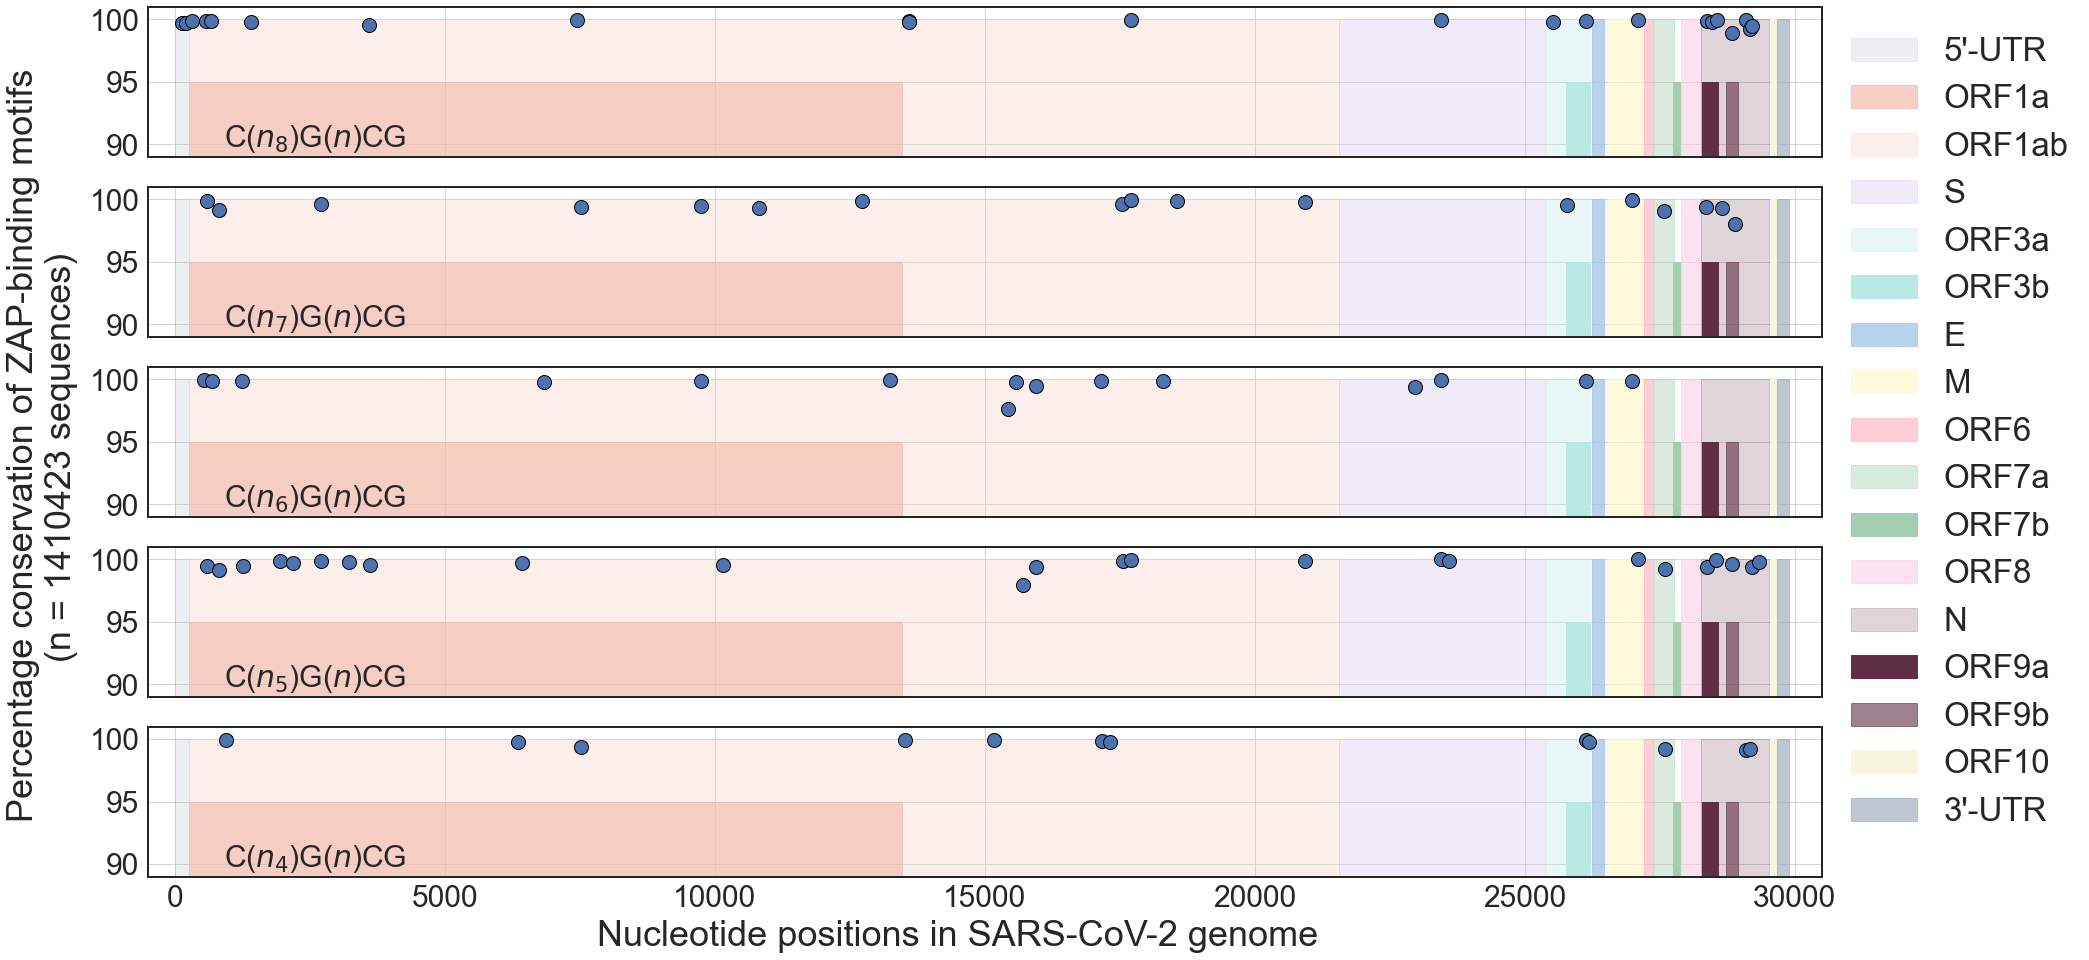

In [268]:
plt.rcParams['axes.facecolor'] = (1,1,1)
plt.rcParams['savefig.facecolor'] = (1,1,1)

fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(30, 16))

fig5a_plotter(ax[0], df_zap8, m=8)
fig5a_plotter(ax[1], df_zap7, m=7)
fig5a_plotter(ax[2], df_zap6, m=6)
fig5a_plotter(ax[3], df_zap5, m=5)
fig5a_plotter(ax[4], df_zap4, m=4, axis=False)

fig.text(
    0.5, 0.065, 
    'Nucleotide positions in SARS-CoV-2 genome', 
    horizontalalignment='center', 
    fontsize=36
)
fig.text(
    0.06, 0.5, 
    'Percentage conservation of ZAP-binding motifs\n'\
    '                'f'(n = {total_seqs_analyzed} sequences)', 
    verticalalignment='center', 
    rotation='vertical', 
    fontsize=36
)

lines_labels = [ax[0].get_legend_handles_labels()]
lines, labels = [sum(label_, []) for label_ in zip(*lines_labels)]

add_sars_cov2_patches_to_plot(
    AX=ax[1], legend_location=(1, 5.8), legend_font_size=33, ymax=190, legend_visibility=False
)
add_sars_cov2_patches_to_plot(
    AX=ax[2], legend_location=(1, 5.8), legend_font_size=33, ymax=190, legend_visibility=False
)
add_sars_cov2_patches_to_plot(
    AX=ax[3], legend_location=(1, 5.8), legend_font_size=33, ymax=190, legend_visibility=False
)
add_sars_cov2_patches_to_plot(
    AX=ax[4], legend_location=(1, 5.8), legend_font_size=33, ymax=190, legend_visibility=False
)
add_sars_cov2_patches_to_plot(
    AX=ax[0], legend_location=(1, 5.8), legend_font_size=33, ymax=190
)

### Fig. 5.(b)

All ZAP-binding motifs end with a terminal CpG dinucleotide. The percentage of sequences that lost ZAP-binding motifs and the terminal CpG within the motifs are plotted. The loss of ZAP-binding motifs from the SARS-CoV-2 genomes is primarily associated with the loss of the terminal CpG within motifs.

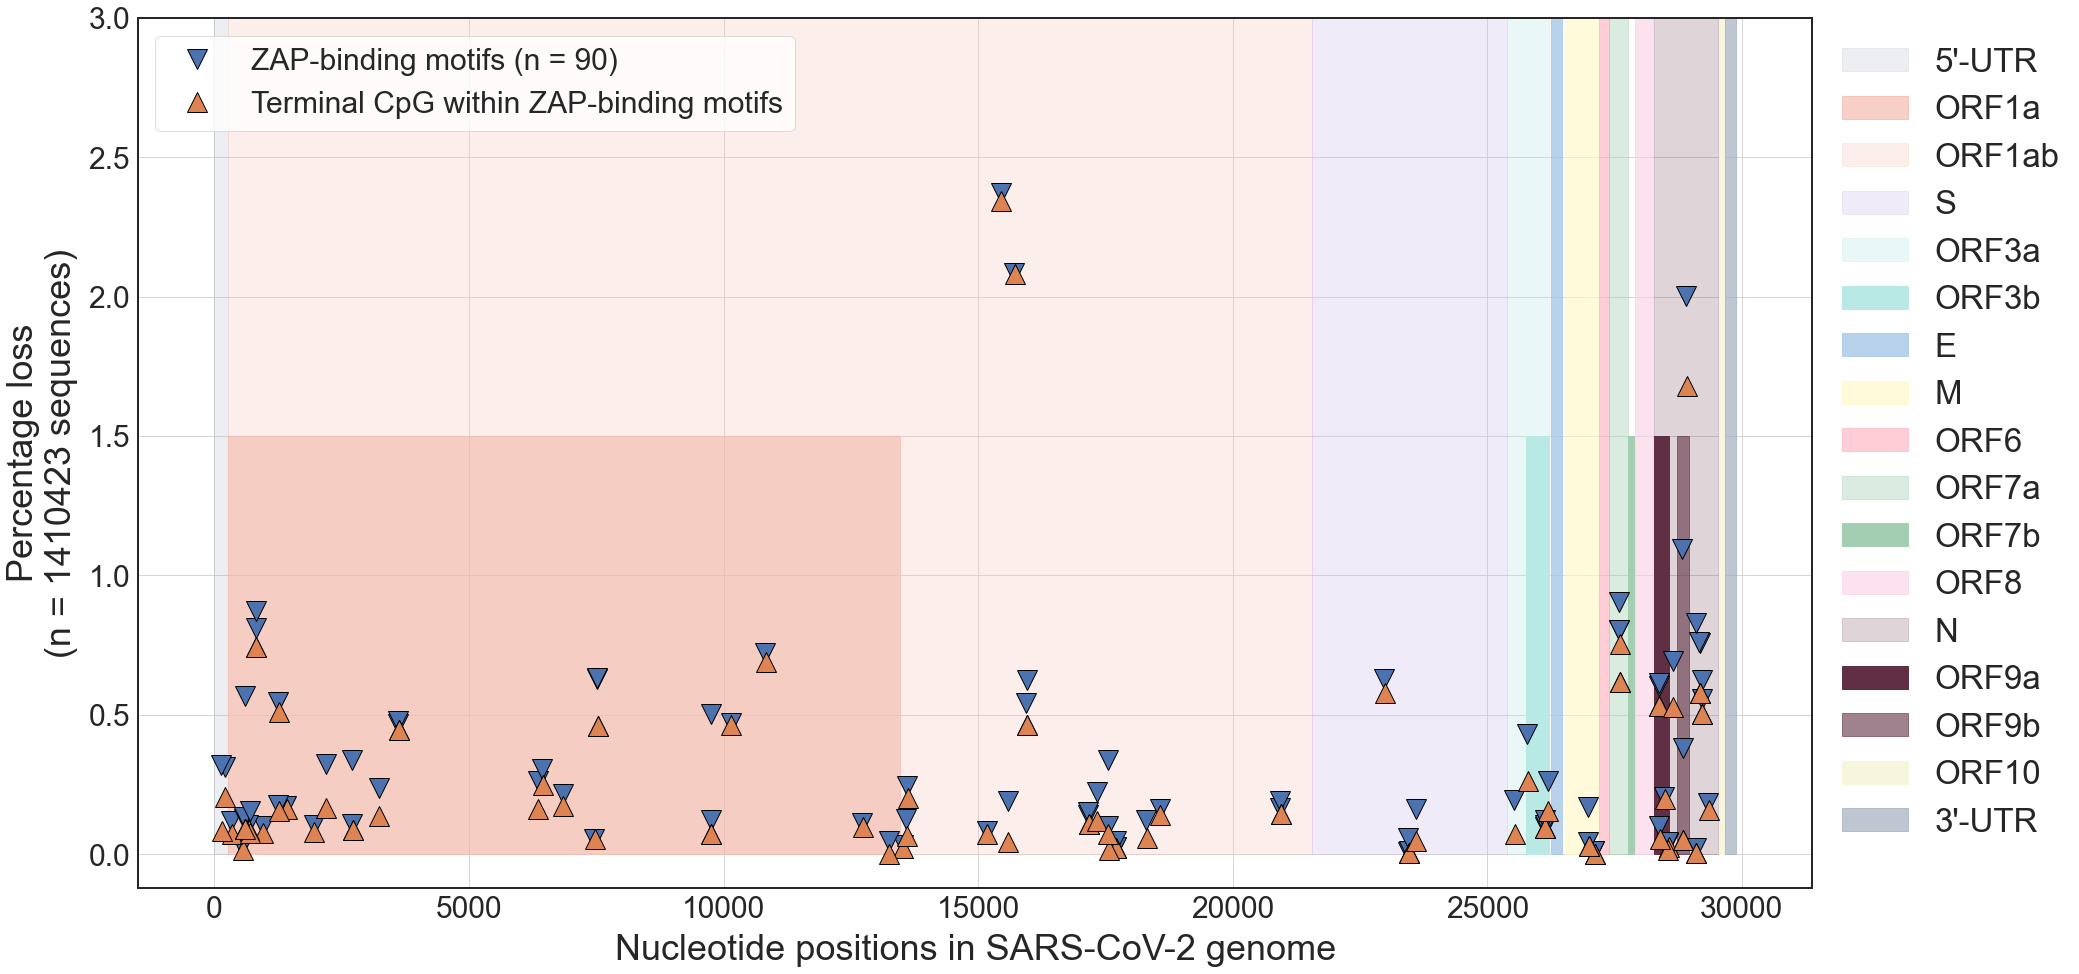

In [269]:
plt.rcParams['figure.figsize'] = (30, 16)
plt.rcParams['axes.facecolor'] = (1,1,1)
plt.rcParams['savefig.facecolor'] = (1,1,1)


fig, ax = plt.subplots()

ax.grid(True)
ax.set_ylabel(f'Percentage loss\n(n = {total_seqs_analyzed} sequences)', fontsize=36, labelpad=10)
ax.set_xlabel('Nucleotide positions in SARS-CoV-2 genome', fontsize=36, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylim([-.12, 3])

line1, = ax.plot(
    df['Positions of ZAP-binding motifs'], df['Percentage of sequences where ZAP-binding motif is lost'], 
    marker='v', markersize=20 , markeredgecolor='black', 
    linestyle='', 
    label=f'ZAP-binding motifs (n = {len(df)})', 
    alpha=1
)

line2, = ax.plot(
    df['Terminal CpG position in the genome'], df['Percentage of sequences where terminal CpG is lost'], 
    marker='^', markersize=20, markeredgecolor='black', 
    linestyle='', 
    label='Terminal CpG within ZAP-binding motifs', 
    alpha=1
)

first_legend = ax.legend(
    handles=[line1, line2], 
    loc=(0.01,0.87), 
    fontsize=30, 
    frameon=True, 
    facecolor='white'
)
ax.add_artist(first_legend)

add_sars_cov2_patches_to_plot(
    ax, legend_location=(1, 1), legend_font_size=33, ymax=3
)


### Fig. 5.(c) and 5.(d)

The number of sequences that lost CpG dinucleotides in the SARS-CoV-2 genome were analyzed. The extent of CpG depletion from the terminal CpG site within the ZAP-binding motif is comparable to that from the other CpG sites (i.e., all CpGs other than the terminal CpG site within ZAP-binding motifs) in the SARS-CoV-2 genome. Since ZAP-binding motifs may be overlapping, only nonoverlapping or unique CpG sites are considered. 

The loss of CpGs from all the CpG sites in ZAP-binding motifs (includes the terminal CpG and all other CpGs within ZAP-binding motifs) is comparable to that from all the CpG sites outside ZAP-binding motifs in the SARS-CoV-2 genomes. Since ZAP-binding motifs may be overlapping, only nonoverlapping or unique CpG sites are considered for the violin plots. 

The Mann–Whitney U test was used to compare the medians in the violin plots. 

ZAP, zinc-finger antiviral protein. 


The data analysis for this plot was done by [Dr. Vivekanandan Perumal](https://scholar.google.com/citations?user=CrJnGS0AAAAJ&hl=en&oi=ao) in MS Excel. The results of the analysis were saved from the .xlsx sheet to .csv files and we'll create visualizations using those files.

In [270]:
term_ZAP = df_cpgs_in_zap.loc[:, ['term_ZAP']]\
                        .rename(columns={'term_ZAP': 'data_col'})\
                        .assign(hue='Terminal CpGs in ZAP-binding motifs (n=66)')
term_NOTZAP = df_cpgs_in_zap.loc[:, ['term_NOTZAP']]\
                        .rename(columns={'term_NOTZAP': 'data_col'})\
                        .assign(hue='All other CpGs in ZAP-binding motifs (n=373)')

all_ZAP = df_cpgs_in_zap.loc[:, ['all_ZAP']]\
                        .rename(columns={'all_ZAP': 'data_col'})\
                        .assign(hue='All CpGs in ZAP-binding motifs (n=87)')
all_NOTZAP = df_cpgs_in_zap.loc[:, ['all_NOTZAP']]\
                        .rename(columns={'all_NOTZAP': 'data_col'})\
                        .assign(hue='CpGs outside ZAP-binding motifs (n=352)')

term_ZAP.dropna(inplace=True)
term_NOTZAP.dropna(inplace=True)
all_ZAP.dropna(inplace=True)
all_NOTZAP.dropna(inplace=True)

term_ZAP['norm_data_col'] = term_ZAP.data_col.apply(np.log10)
term_NOTZAP['norm_data_col'] = term_NOTZAP.data_col.apply(np.log10)
all_ZAP['norm_data_col'] = all_ZAP.data_col.apply(np.log10)
all_NOTZAP['norm_data_col'] = all_NOTZAP.data_col.apply(np.log10)

df_terminal_cpgs = pd.concat([term_ZAP, term_NOTZAP])\
                     .reset_index(drop=True)
df_all_cpgs = pd.concat([all_ZAP, all_NOTZAP])\
                .reset_index(drop=True)

#### Mann-Whitney U test

[Mann-Whitney U rank test on two independent samples](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of of difference in location between distributions.

Now, we'll conduct Mann-Whitney U test for Fig. 5.(c) and 5.(d).

In [271]:
m_term_norm, p_term_norm = stats.mannwhitneyu(
    term_ZAP['norm_data_col'], term_NOTZAP['norm_data_col'], 
    alternative='two-sided', 
    method='auto'
)
print(f'For Fig. 5.(c) violins\' data, m: {m_term_norm} and p: {p_term_norm}')

m_all_norm, p_all_norm = stats.mannwhitneyu(
    all_ZAP['norm_data_col'], all_NOTZAP['norm_data_col'], 
    alternative='two-sided', 
    method='auto'
)
print(f'For Fig. 5.(d) violins\' data, m: {m_all_norm} and p: {p_all_norm}')


For Fig. 5.(c) violins' data, m: 13633.5 and p: 0.1634500382542774
For Fig. 5.(d) violins' data, m: 16498.5 and p: 0.2630431837157363


#### Plots

In [272]:
sns.set_theme(style='white')
sns.set_context(
    'paper', font_scale=1, 
    rc={ 
        'ytick.labelsize': 60, 
        'xtick.labelsize': 60, 
        'axes.edgecolor':0.05, 
        'axes.linewidth':2
    }
)

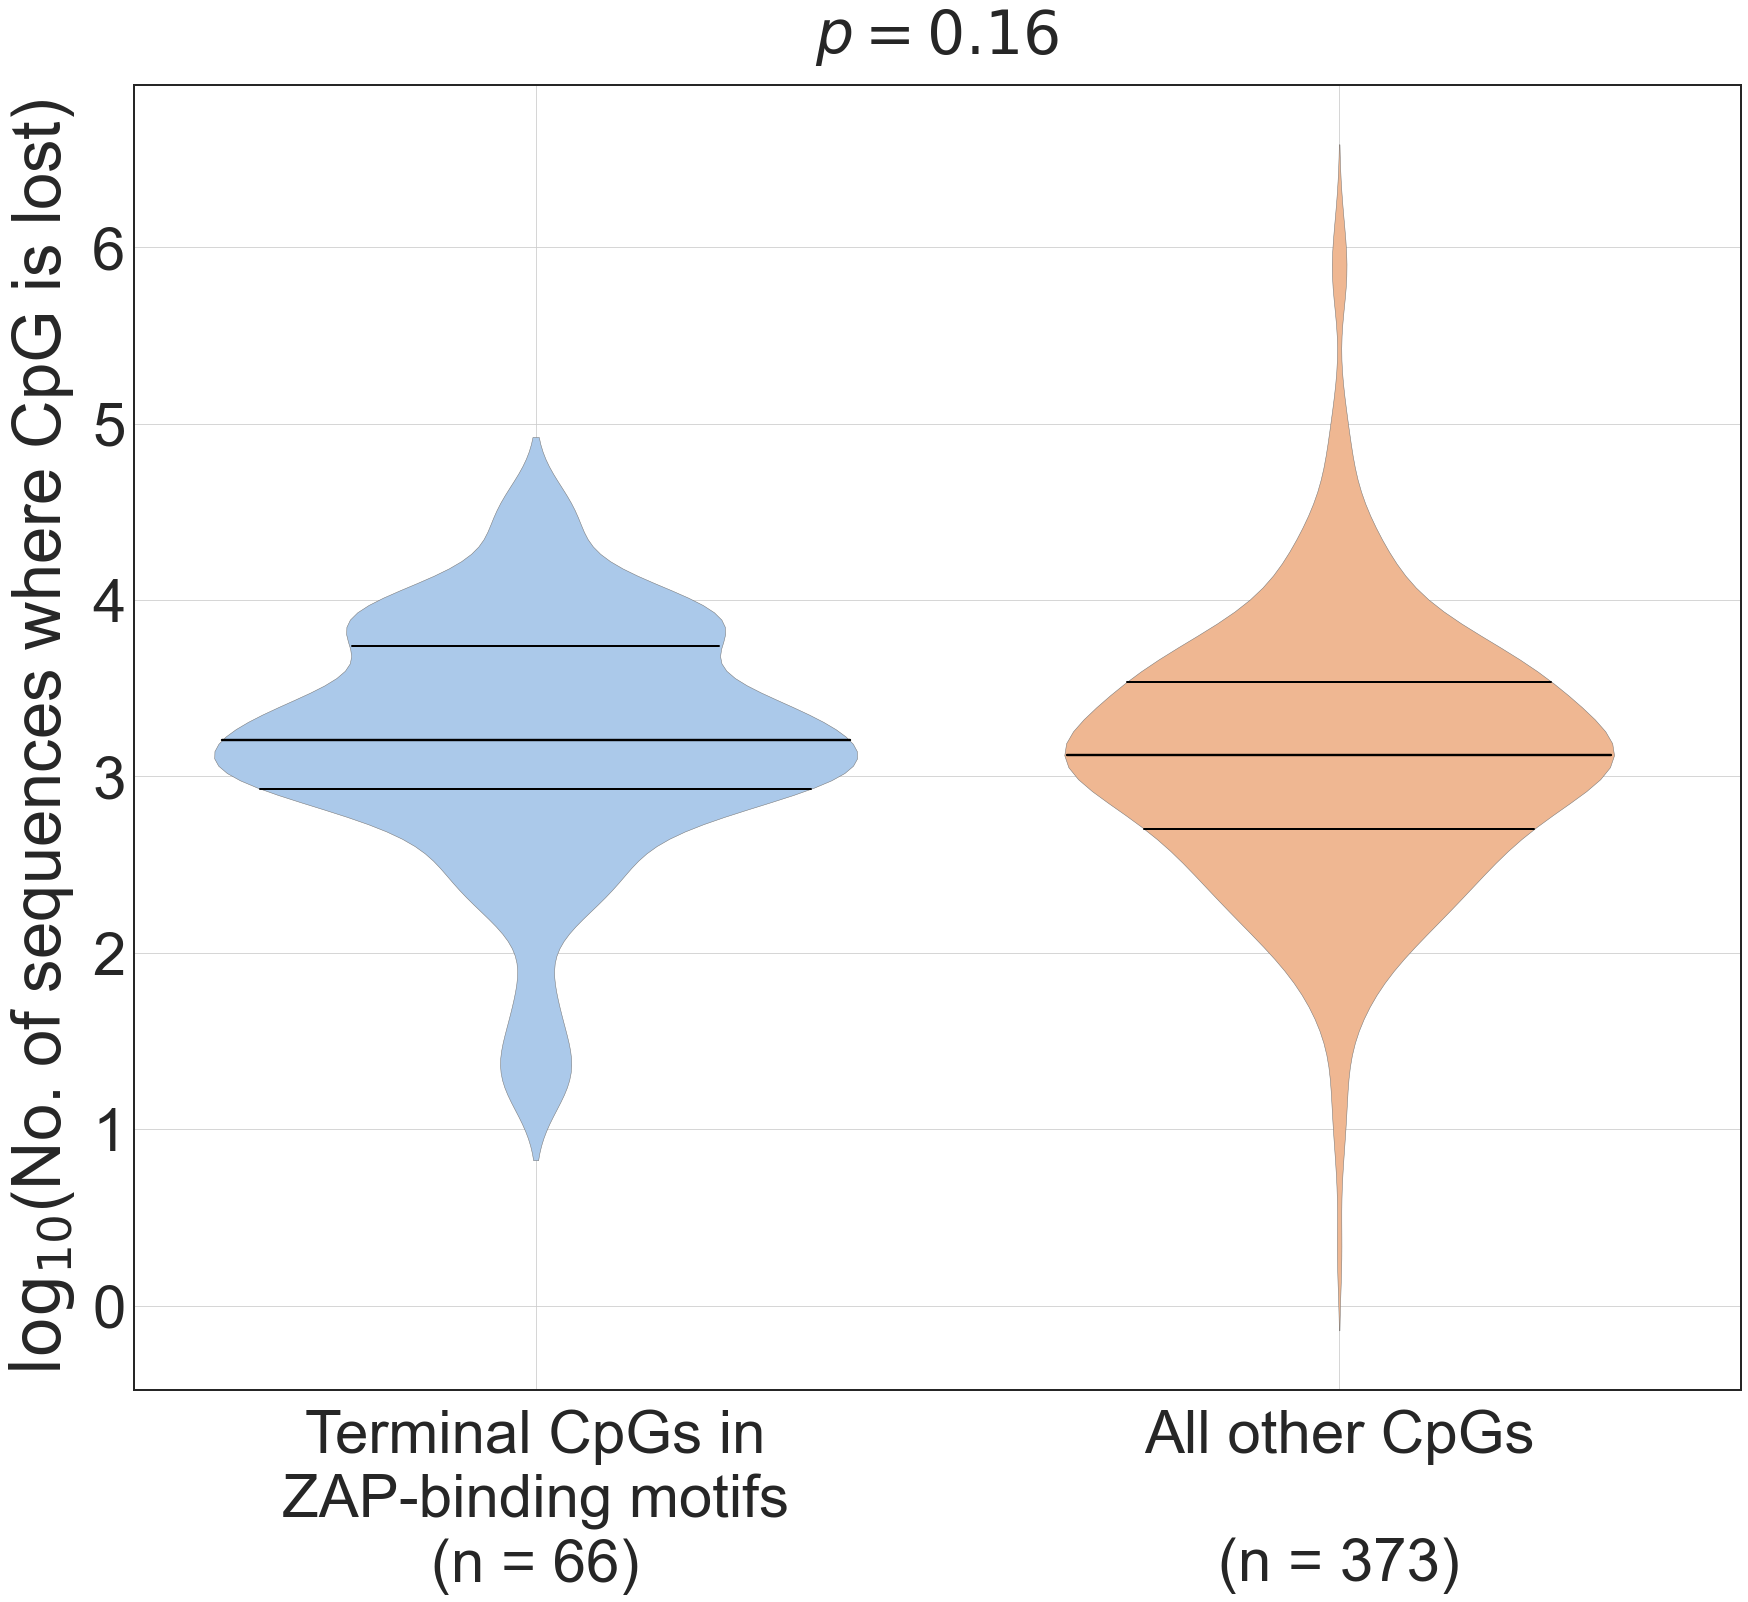

In [273]:
plt.figure(figsize=(16*1.8, 24))

ax = sns.violinplot(
    x='hue', y=df_terminal_cpgs['norm_data_col'], 
    data=df_terminal_cpgs, 
    order=[
        'Terminal CpGs in ZAP-binding motifs (n=66)', 
        'All other CpGs in ZAP-binding motifs (n=373)'
    ], 
    inner='quartile', 
    linewidth=0.5, bw=0.3, 
    palette='pastel'
)

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(2.4)
    l.set_color('black')

ax.set_xticklabels(
    [
        'Terminal CpGs in''\n''ZAP-binding motifs''\n'f'(n = {len(term_ZAP)})', 
        'All other CpGs''\n''\n'f'(n = {len(term_NOTZAP)})', 
    ]
)
ax.tick_params(axis='x', which='major', pad=15)
ax.text(
    0.5, 1.06, f'$p = {p_term_norm:.2f}$', 
    horizontalalignment='center', 
    verticalalignment='top', 
    transform=ax.transAxes, 
    size=60
)
ax.set_ylabel(
    r'$\log_{10}$(No. of sequences where CpG is lost)', 
    size=67, labelpad=15
)
ax.set_xlabel(None)
ax.grid(True)

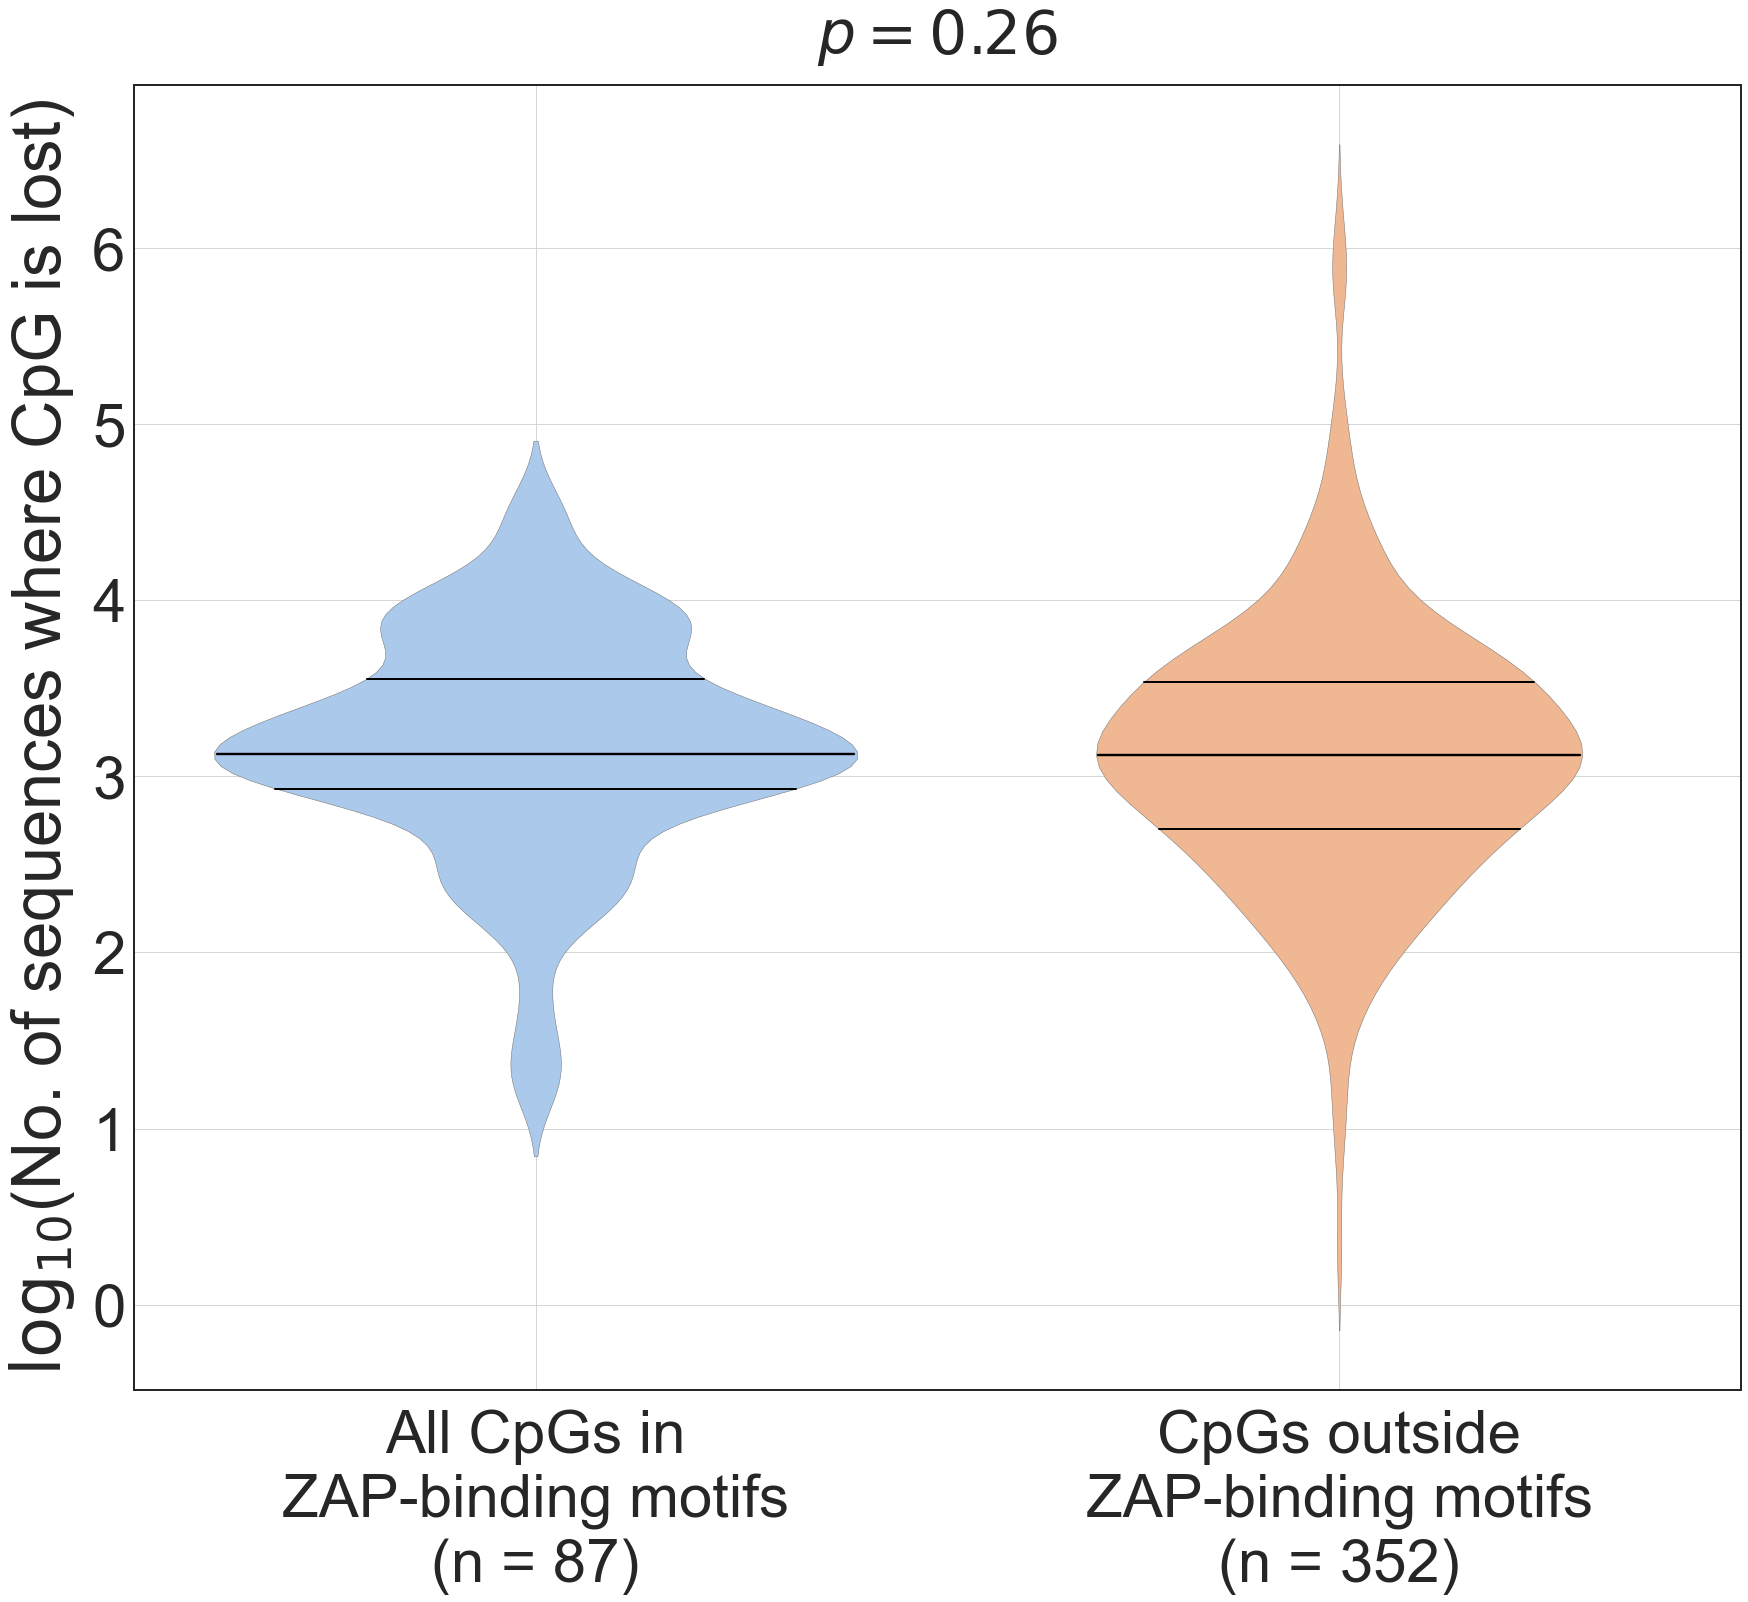

In [274]:
plt.figure(figsize=(16*1.8, 24))

ax = sns.violinplot(
    x='hue', y=df_all_cpgs['norm_data_col'], 
    data=df_all_cpgs, 
    order=[
        'All CpGs in ZAP-binding motifs (n=87)', 
        'CpGs outside ZAP-binding motifs (n=352)'
    ], 
    inner='quartile', 
    linewidth=0.5, bw=0.3, 
    palette='pastel'
)

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(2.4)
    l.set_color('black')

ax.set_xticklabels(
    [
        'All CpGs in''\n''ZAP-binding motifs''\n'f'(n = {len(all_ZAP)})', 
        'CpGs outside''\n''ZAP-binding motifs''\n'f'(n = {len(all_NOTZAP)})', 
    ]
)
ax.tick_params(axis='x', which='major', pad=15)
ax.text(
    0.5, 1.06, f'$p = {p_all_norm:.2f}$', 
    horizontalalignment='center', 
    verticalalignment='top', 
    transform=ax.transAxes, 
    size=60
)
ax.set_ylabel(
    r'$\log_{10}$(No. of sequences where CpG is lost)', 
    size=67, labelpad=15
)
ax.set_xlabel(None)
ax.grid(True)

## Fig. 6: Selective loss of CpG motifs from a U-rich context in SARS-CoV-2 genomes to avoid immune recognition by TLR7

The number of sequences that lost CpG motifs in an A/U-rich context was analyzed. The extent of CpG motif depletion from an A/U-rich context was comparable to that from the other CpG sites (i.e., non-A/U-rich context). 

The selective loss of CpG motifs from SARS-CoV-2 genomes in a U-rich context (i.e., 4Us in the motif NNN-CG-NN) as compared with CpG motifs that are flanked by fewer Us (i.e., 1 to 3Us or no Us). There were no CpG motifs that were flanked by 5Us. Only CpGs outside ZAP-binding motifs (n = 352) were considered for this analysis (see Materials and Methods for details). 

TLR7, toll-like receptor 7.

In [332]:
df_tlr7['norm_freq_of_seq_that_lost_cpg'] = df_tlr7.freq_of_seq_that_lost_cpg.apply(np.log10)

df_tlr7['motif_decorated'] = df_tlr7.cpg_pos.apply(
    lambda x: f'{ref_seq[x - 4: x - 1]}({ref_seq[x - 1: x + 1]}){ref_seq[x + 1: x + 3]}'
)
df_tlr7['motif'] = df_tlr7.cpg_pos.apply(
    lambda x: f'{ref_seq[x - 4: x - 1]}{ref_seq[x - 1: x + 1]}{ref_seq[x + 1: x + 3]}'
)

df_tlr7['nCGn_seq_in_motif'] = df_tlr7['motif'].str[2:6]
df_tlr7['count_A'] = df_tlr7.motif.str.count('A')
df_tlr7['count_T'] = df_tlr7.motif.str.count('T')


In [333]:
# For (A/T)CG(A/T) motifs
# -------------------------------------------------
# For 5 bins ------------------------------------
AA = df_tlr7.query('nCGn_seq_in_motif == "ACGA"')
AT = df_tlr7.query('nCGn_seq_in_motif == "ACGT"')
TA = df_tlr7.query('nCGn_seq_in_motif == "TCGA"')
TT = df_tlr7.query('nCGn_seq_in_motif == "TCGT"')

other_combinations = df_tlr7.query(
    '~'
    '('
        'nCGn_seq_in_motif == "ACGA" | '
        'nCGn_seq_in_motif == "ACGT" | '
        'nCGn_seq_in_motif == "TCGA" | '
        'nCGn_seq_in_motif == "TCGT"'
    ')'
)

# For 3 bins ------------------------------------
AAATTA = df_tlr7.query(
    'nCGn_seq_in_motif == "ACGA" | '
    'nCGn_seq_in_motif == "ACGT" | '
    'nCGn_seq_in_motif == "TCGA"'
)
# we already have TT and Rest

# For 2 bins ------------------------------------
AAATTATT = df_tlr7.query(
    'nCGn_seq_in_motif == "ACGA" | '
    'nCGn_seq_in_motif == "ACGT" | '
    'nCGn_seq_in_motif == "TCGA" | '
    'nCGn_seq_in_motif == "TCGT"'
)
# we already have other_combinations
# -------------------------------------------------


def give_tlr7_related_dfs_name():
    AA.name = 'AA'
    AT.name = 'AT'
    TA.name = 'TA'
    TT.name = 'TT'
    AAATTATT.name = 'AAATTATT'
    AAATTA.name = 'AAATTA'
    other_combinations.name = 'Other combinations'

    
give_tlr7_related_dfs_name()

AA = AA.assign(hue=AA.name)
AT = AT.assign(hue=AT.name)
TA = TA.assign(hue=TA.name)
TT = TT.assign(hue=TT.name)
AAATTATT = AAATTATT.assign(hue=AAATTATT.name)
AAATTA = AAATTA.assign(hue=AAATTA.name)
other_combinations = other_combinations.assign(hue=other_combinations.name)

give_tlr7_related_dfs_name()

In [334]:
# For base_count = 0, 1/2, 3, 4/5
# -------------------------------------------------
# For Ts ----------------------------------------
Teq0 = df_tlr7.query('count_T == 0')
Teq1or2 = df_tlr7.query('count_T == 1 | count_T == 2')
Teq3 = df_tlr7.query('count_T == 3')
Teq4or5 = df_tlr7.query('count_T == 4 | count_T == 5')

# For As ----------------------------------------
Aeq0 = df_tlr7.query('count_A == 0')
Aeq1or2 = df_tlr7.query('count_A == 1 | count_A == 2')
Aeq3 = df_tlr7.query('count_A == 3')
Aeq4or5 = df_tlr7.query('count_A == 4 | count_A == 5')
# -------------------------------------------------


def give_tlr7_related_dfs_name_2():
    Teq0.name = 'T=0'
    Teq1or2.name = 'T=1/2'
    Teq3.name = 'T=3'
    Teq4or5.name = 'T=4/5'

    Aeq0.name = 'A=0'
    Aeq1or2.name = 'A=1/2'
    Aeq3.name = 'A=3'
    Aeq4or5.name = 'A=4/5'
    
give_tlr7_related_dfs_name_2()

Teq0 = Teq0.assign(hue=Teq0.name)
Teq1or2 = Teq1or2.assign(hue=Teq1or2.name)
Teq3 = Teq3.assign(hue=Teq3.name)
Teq4or5 = Teq4or5.assign(hue=Teq4or5.name)

Aeq0 = Aeq0.assign(hue=Aeq0.name)
Aeq1or2 = Aeq1or2.assign(hue=Aeq1or2.name)
Aeq3 = Aeq3.assign(hue=Aeq3.name)
Aeq4or5 = Aeq4or5.assign(hue=Aeq4or5.name)

In [335]:
n_Teq5 = len(Teq4or5.query('count_T == 5'))
n_Aeq5 = len(Aeq4or5.query('count_A == 5'))
print(f'Entries with count(T)=5: {n_Teq5},'
      f'\nEntries with count(A)=5: {n_Aeq5}')

Entries with count(T)=5: 0,
Entries with count(A)=5: 7


Since, there are no entries with count(T) = 5, so, we'll write it as 4 Ts only instead of 4 or 5 Ts in our plot.

In [337]:
def give_tlr7_related_dfs_name_2():
    Teq0.name = 'T=0'
    Teq1or2.name = 'T=1/2'
    Teq3.name = 'T=3'
    Teq4or5.name = 'T=4'

    Aeq0.name = 'A=0'
    Aeq1or2.name = 'A=1/2'
    Aeq3.name = 'A=3'
    Aeq4or5.name = 'A=4/5'

give_tlr7_related_dfs_name_2()

Teq4or5 = Teq4or5.assign(hue=Teq4or5.name)

give_tlr7_related_dfs_name_2()

In [338]:
df_5bins = pd.concat([AA, AT, TA, TT, other_combinations])\
             .reset_index(drop=True)
df_3bins = pd.concat([AAATTA, TT, other_combinations])\
             .reset_index(drop=True)
df_2bins = pd.concat([AAATTATT, other_combinations])\
             .reset_index(drop=True)

df_T = pd.concat([Teq0, Teq1or2, Teq3, Teq4or5])\
             .reset_index(drop=True)
df_A = pd.concat([Aeq0, Aeq1or2, Aeq3, Aeq4or5])\
             .reset_index(drop=True)

### Mann-Whitney U test

The Mann–Whitney U test is used to compare the medians for Fig. 6.(a) and 6.(b). 

In [339]:
print('Mann-Whitney U test results: ')

def mannwhitney_u_test(DF1, DF2):    
    m, p = stats.mannwhitneyu(
        DF1[DF1.columns.values[1]], DF2[DF2.columns.values[1]], 
        alternative='two-sided', 
        method='auto'
    )
    print(f'->  For {DF1.name} and {DF2.name}, m: {m} and p: {p}')


mannwhitney_u_test(AA, AT)
mannwhitney_u_test(AA, TA)
mannwhitney_u_test(AA, TT)
mannwhitney_u_test(AA, other_combinations)
mannwhitney_u_test(AT, TA)
mannwhitney_u_test(AT, TT)
mannwhitney_u_test(AT, other_combinations)
mannwhitney_u_test(TA, TT)
mannwhitney_u_test(TA, other_combinations)
mannwhitney_u_test(TT, other_combinations)

mannwhitney_u_test(AAATTA, TT)
mannwhitney_u_test(AAATTA, other_combinations)
mannwhitney_u_test(TT, other_combinations)

mannwhitney_u_test(AAATTATT, other_combinations)


mannwhitney_u_test(Teq0, Teq1or2)
mannwhitney_u_test(Teq0, Teq3)
mannwhitney_u_test(Teq0, Teq4or5)
mannwhitney_u_test(Teq1or2, Teq3)
mannwhitney_u_test(Teq1or2, Teq4or5)
mannwhitney_u_test(Teq3, Teq4or5)

mannwhitney_u_test(Aeq0, Aeq1or2)
mannwhitney_u_test(Aeq0, Aeq3)
mannwhitney_u_test(Aeq0, Aeq4or5)
mannwhitney_u_test(Aeq1or2, Aeq3)
mannwhitney_u_test(Aeq1or2, Aeq4or5)
mannwhitney_u_test(Aeq3, Aeq4or5)


Mann-Whitney U test results: 
->  For AA and AT, m: 955.0 and p: 0.24230600022203186
->  For AA and TA, m: 206.0 and p: 0.7853504826355544
->  For AA and TT, m: 503.0 and p: 0.5477805264097947
->  For AA and Other combinations, m: 3243.0 and p: 0.6632493005914646
->  For AT and TA, m: 345.0 and p: 0.25553880739098367
->  For AT and TT, m: 799.5 and p: 0.03156489753407866
->  For AT and Other combinations, m: 5188.0 and p: 0.0921026191736589
->  For TA and TT, m: 264.0 and p: 0.6856453084237345
->  For TA and Other combinations, m: 1676.5 and p: 0.7505514033152976
->  For TT and Other combinations, m: 4680.5 and p: 0.12469312119074419
->  For AAATTA and TT, m: 1566.5 and p: 0.09621663244110477
->  For AAATTA and Other combinations, m: 10107.5 and p: 0.3881545797104311
->  For TT and Other combinations, m: 4680.5 and p: 0.12469312119074419
->  For AAATTATT and Other combinations, m: 14788.0 and p: 0.9871761326059784
->  For T=0 and T=1/2, m: 5961.5 and p: 0.3646928881746897
->  For T=0 a

### Fig. 6.(a) and 6.(b)

In [340]:
sns.set_theme(style='white')
sns.set_context(
    'paper', font_scale=1, 
    rc={ 
        'ytick.labelsize': 60, 
        'xtick.labelsize': 60, 
        'axes.edgecolor':0.05, 
        'axes.linewidth':2
    }
)

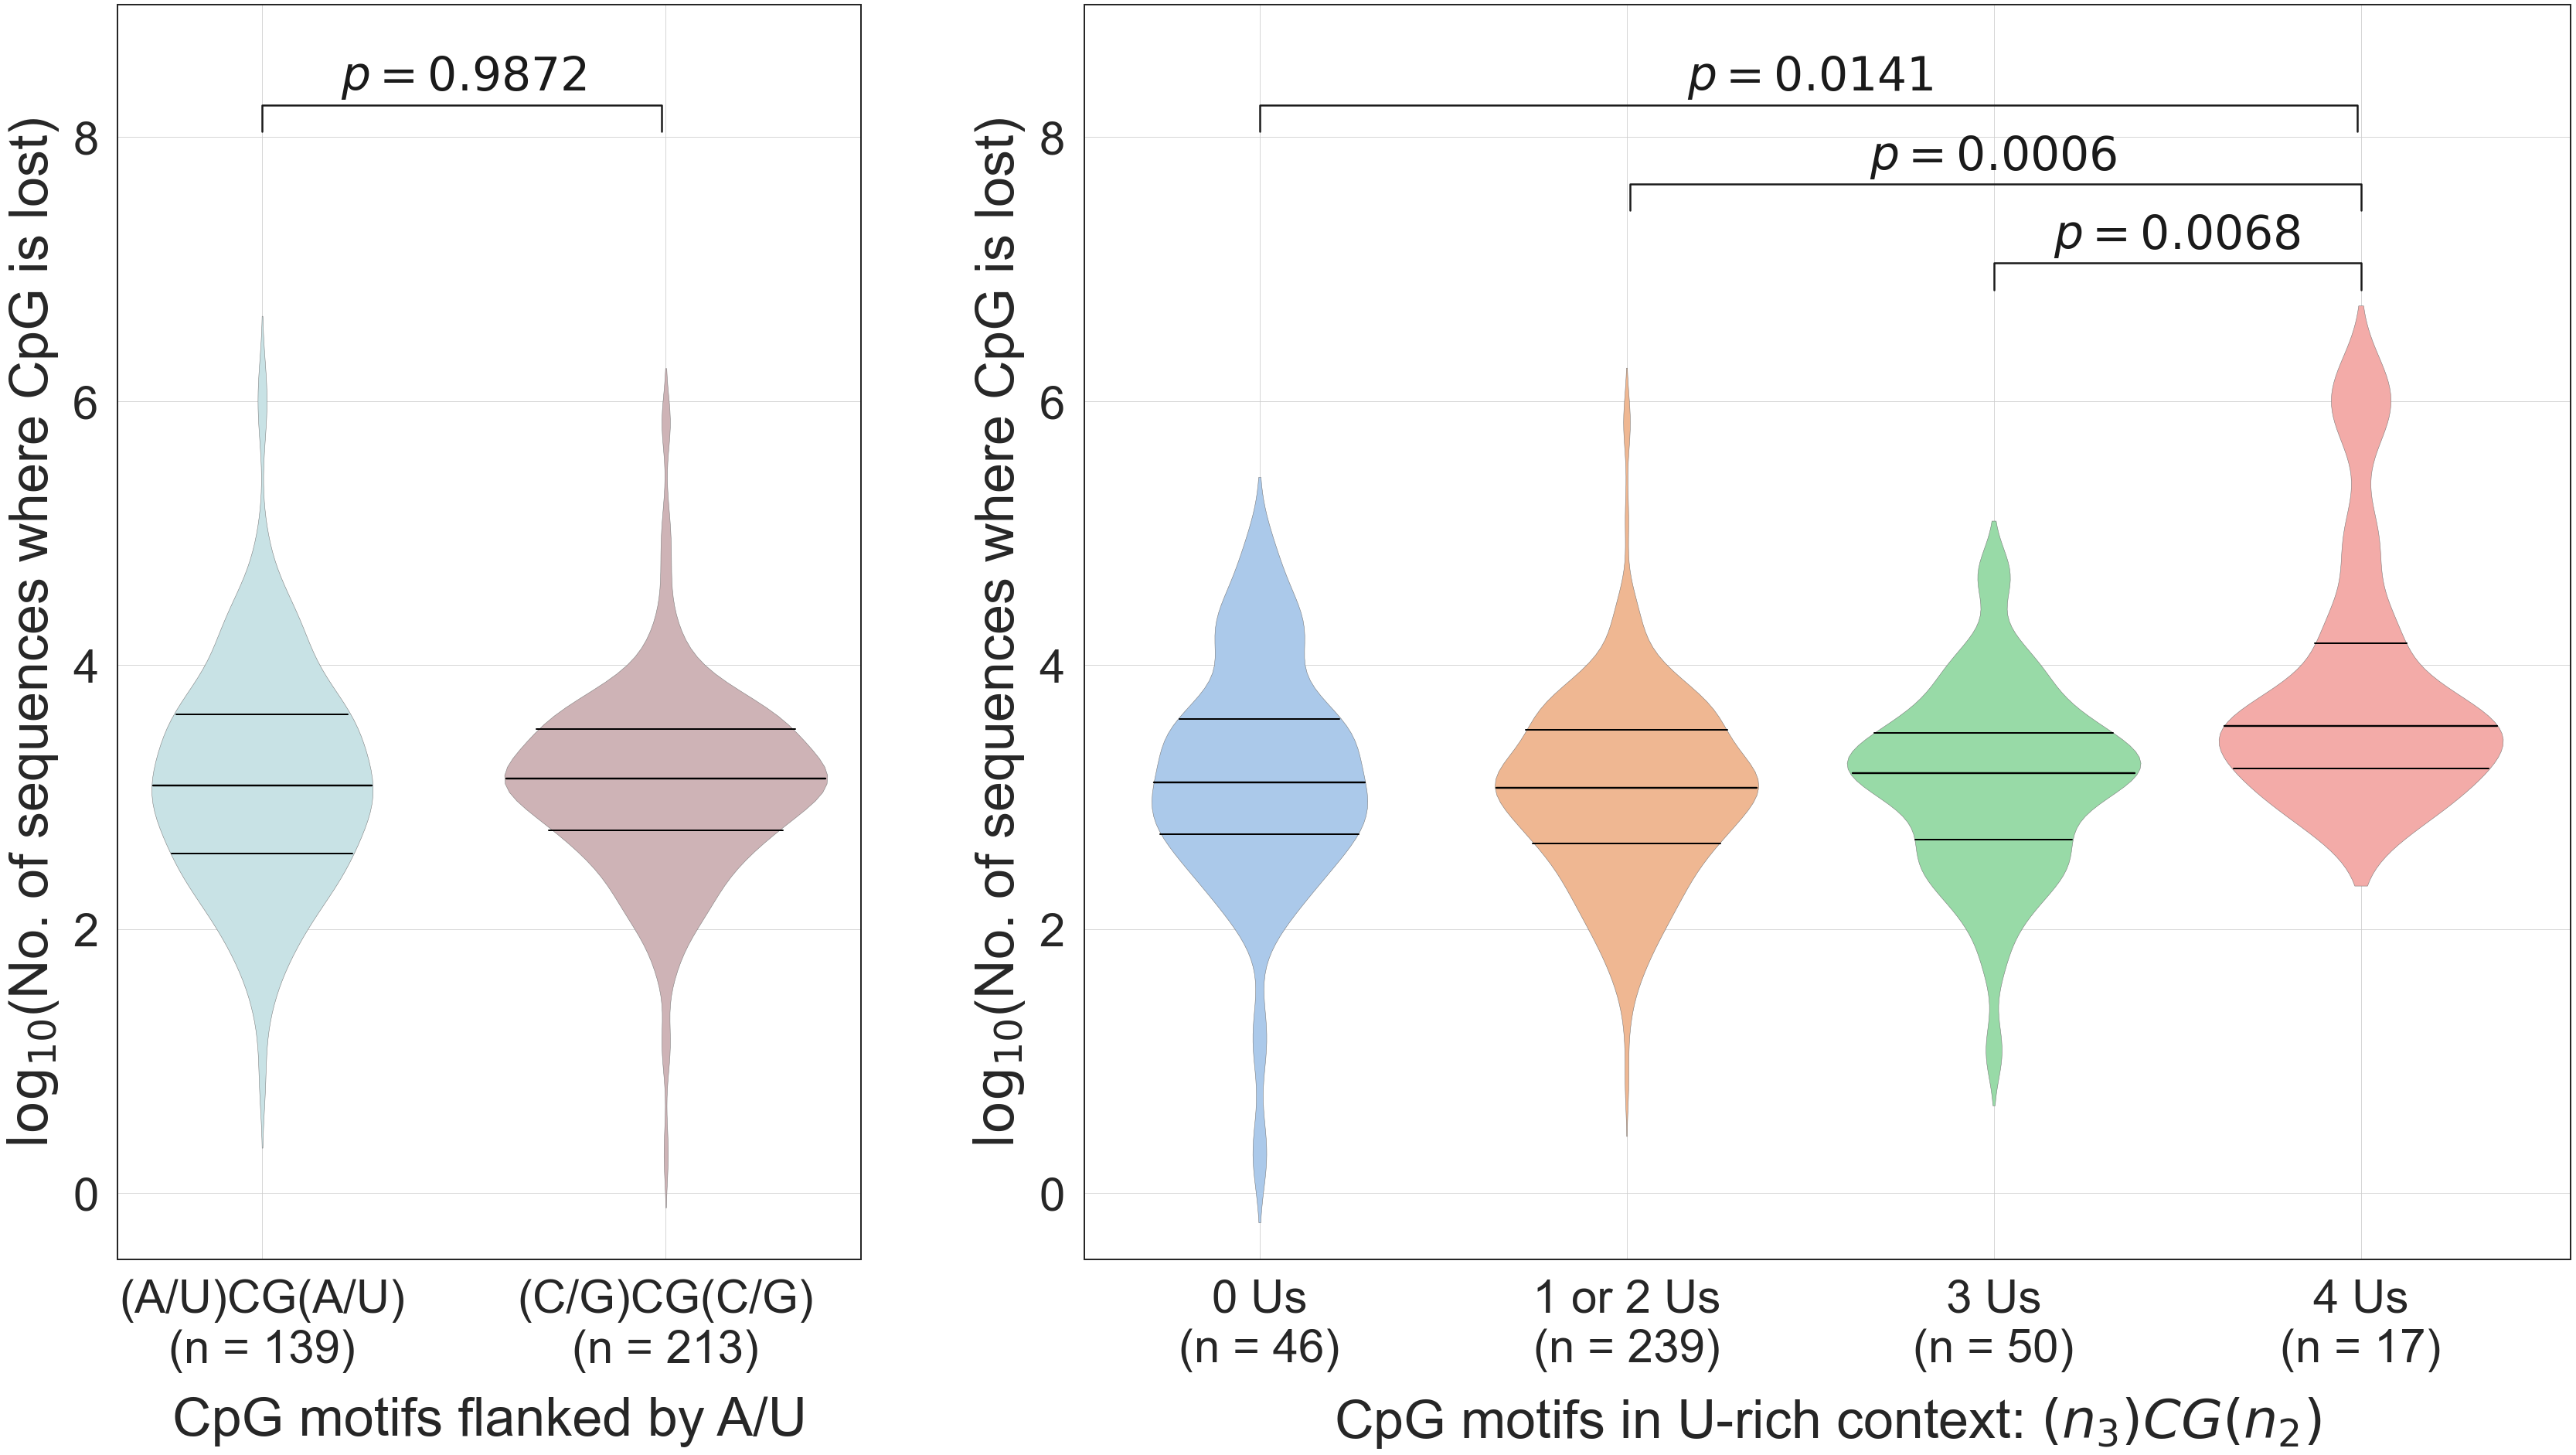

In [345]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, 
    sharex=False, sharey=False, 
    figsize=(56, 24), 
    gridspec_kw={'width_ratios': [1/2, 1]}
)
fig.tight_layout()
# ---------------------------------------------------------------------------
# Plot 1: ax[0] -----------------------------------------------------------

to_plot = df_2bins

my_palette = ['#C3E6EA', '#D2AFB3']

sns.violinplot(
    x='hue', y=to_plot['norm_freq_of_seq_that_lost_cpg'], 
    data=to_plot, 
    order=['AAATTATT', 'Other combinations'], 
    inner='quartile', 
    linewidth=0.5, bw=0.3, 
    palette=my_palette, 
    ax=ax[0]
)

for l in ax[0].lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
for l in ax[0].lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(2.4)
    l.set_color('black')
    
# statistical annotation
x1, x2 = 0, 1   
y, h, col = to_plot['norm_freq_of_seq_that_lost_cpg'].max() + 1.9, .2, 'k'
ax[0].plot(
    [x1, x1, x2-.01, x2-.01], [y, y+h, y+h, y], 
    lw=2.5, 
    color=col
)
ax[0].text(
    (x1+x2)*.5, y+h+.03, 
    r'$p = 0.9872$', 
    ha='center', va='bottom', 
    color=col, 
    size=60
)    

ax[0].set_xticklabels(
    [
        '(A/U)CG(A/U)''\n'f'(n = {len(AAATTATT)})', 
        '(C/G)CG(C/G)''\n'f'(n = {len(other_combinations)})'
    ]
)
ax[0].set_ylabel(r'$\log_{10}$(No. of sequences where CpG is lost)', size=70, labelpad=15)
ax[0].set_xlabel('CpG motifs flanked by A/U', size=70, labelpad=30)
ax[0].set_ylim(-.5, 9)
ax[0].tick_params(axis='both', which='major', pad=20)
ax[0].grid()
# ---------------------------------------------------------------------------
# Plot 2: ax[1] -----------------------------------------------------------

to_plot = df_T

sns.violinplot(
    x='hue', y=to_plot['norm_freq_of_seq_that_lost_cpg'], 
    data=to_plot, 
    order=['T=0', 'T=1/2', 'T=3', 'T=4'], 
    inner='quartile', 
    linewidth=0.5, bw=0.3, 
    palette='pastel', 
    ax=ax[1]
)

for l in ax[1].lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
for l in ax[1].lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(2.4)
    l.set_color('black')


# statistical annotation
x1, x2 = 0, 3   
y, h, col = to_plot['norm_freq_of_seq_that_lost_cpg'].max() + 1.9, .2, 'k'
ax[1].plot(
    [x1, x1, x2-.01, x2-.01], [y, y+h, y+h, y], 
    lw=2.5, 
    color=col
)
ax[1].text(
    (x1+x2)*.5, y+h+.03, 
    r'$p = 0.0141$', 
    ha='center', va='bottom', 
    color=col, 
    size=60
)
x1, x2 = 1, 3
y, h, col = to_plot['norm_freq_of_seq_that_lost_cpg'].max() + 1.3, .2, 'k'
ax[1].plot(
    [x1+.01, x1+.01, x2, x2], [y, y+h, y+h, y], 
    lw=2.5, 
    color=col
)
ax[1].text(
    (x1+x2)*.5, y+h+.03, 
    r'$p = 0.0006$', 
    ha='center', va='bottom', 
    color=col, 
    size=60
)
x1, x2 = 2, 3   
y, h, col = to_plot['norm_freq_of_seq_that_lost_cpg'].max() + .7, .2, 'k'
ax[1].plot(
    [x1, x1, x2, x2], [y, y+h, y+h, y], 
    lw=2.5, 
    color=col
)
ax[1].text(
    (x1+x2)*.5, y+h+.03, 
    r'$p = 0.0068$', 
    ha='center', va='bottom', 
    color=col, 
    size=60
)

ax[1].set_xticklabels(
    [
        '0 Us''\n'f'(n = {len(Teq0)})', 
        '1 or 2 Us''\n'f'(n = {len(Teq1or2)})', 
        '3 Us''\n'f'(n = {len(Teq3)})', 
        '4 Us''\n'f'(n = {len(Teq4or5)})'
    ]
)
ax[1].set_ylabel(r'$\log_{10}$(No. of sequences where CpG is lost)', size=70, labelpad=15)
ax[1].set_xlabel(r'CpG motifs in U-rich context: $(n_{3})CG(n_{2})$', size=70, labelpad=30)
ax[1].set_ylim(-.5, 9)
ax[1].tick_params(axis='both', which='major', pad=20)
ax[1].grid()
plt.subplots_adjust(left=0.2, wspace=0.2)


# Saving the dataframes and supplementary tables

## Saving Supplementary Table 2

In [316]:
df.to_csv(
    '../supplementary_tables/Supplementary Table 2.csv', 
    index=False
)

df.head()

,Positions of ZAP-binding motifs,Sequence of ZAP-binding motifs,Percentage conservation of ZAP-binding motifs,Terminal CpG position in the genome,Percentage of sequences where ZAP-binding motif is lost,Percentage of sequences where terminal CpG is lost
0,23451,C(TCCTACTT)G(G)CG,99.991350,23462,0.008650,0.004183
1,27106,C(ATACA)G(T)CG,99.990712,27114,0.009288,0.001489
2,23454,C(TACTT)G(G)CG,99.990358,23462,0.009642,0.004183
3,27103,C(TGCATACA)G(T)CG,99.987876,27114,0.012124,0.001489
4,29091,C(TTTCGGCA)G(A)CG,99.977454,29102,0.022546,0.002198
